<a href="https://colab.research.google.com/github/hyehyunseo/ESAA_OB/blob/main/%ED%9B%84%EC%A7%80_%EC%9A%94%EC%9D%B8%EB%B6%84%EC%84%9D_%EC%88%98%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 나눔 폰트 설치 / 한글 깨짐 방지 , 런타임 다시 시작하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumGothic') #matplotlib 한글 깨짐 방지

In [3]:
# 시각화에 사용할 팔레트 확인
plt.style.available

sns.color_palette("pastel")
sns.set(palette='pastel')

In [33]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/apple/data.xlsx")

df_fuji = df[df['품종']=='후지']
df_fuji

,조사일,과원이름,품종,시험수,과실번호,과중,종경,횡경,L/D 비,경도1,경도2,당도,산도,착색(L),착색(a),착색(b)
15,2015-11-02,김제,후지,1,1,356.0,85.5,96.4,0.890000,30.913,31.473,16.0,0.439000,47.640,25.710,21.350
16,2015-11-02,김제,후지,1,2,310.0,83.3,91.9,0.910000,26.144,31.174,16.3,NaN,47.130,21.110,19.480
17,2015-11-02,김제,후지,1,3,309.5,82.1,91.8,0.890000,31.902,32.643,10.2,0.397000,51.960,15.070,20.250
18,2015-11-02,김제,후지,1,4,341.0,86.9,92.1,0.940000,32.488,33.291,16.2,NaN,53.830,23.140,26.040
19,2015-11-02,김제,후지,1,5,407.5,88.8,98.9,0.900000,32.260,35.515,15.3,0.289000,52.810,17.130,27.740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2022-10-27,포천,후지,3,6,276.5,77.2,88.0,0.877273,30.598,30.598,13.6,0.308736,39.780,24.100,15.480
1506,2022-10-27,포천,후지,3,7,250.0,69.9,83.3,0.839136,35.500,35.500,14.6,0.390342,42.765,22.910,16.040
1507,2022-10-27,포천,후지,3,8,284.0,80.8,88.1,0.917140,29.327,29.327,13.9,0.323744,42.720,23.235,15.120
1508,2022-10-27,포천,후지,3,9,359.0,84.9,94.0,0.903191,30.975,30.975,14.4,0.354430,39.120,24.690,14.710


# 사과 품질 칼럼 만들기

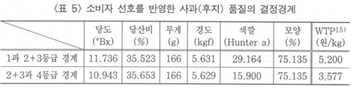


등급별 기준

과중: 320 / 250

당도: 14 / 12

당산비: 41 / 36


In [34]:
# 당산비 칼럼 생성
df_fuji['당산비'] = df_fuji['당도'] / df_fuji['산도']

In [35]:
# 당도, 과중, 당산비 칼럼 null값 평균으로 채우기
mean_values = df_fuji[['당산비', '당도', '과중']].mean()
df_fuji[['당산비', '당도', '과중']] = df_fuji[['당산비', '당도', '과중']].fillna(mean_values)

In [36]:
# '품질' 칼럼 초기화
df_fuji['품질'] = np.nan

# 조건에 따라 '품질' 칼럼 값 설정
for index, row in df_fuji.iterrows():
    if row['당도']>=14 and row['과중']>=320 and row['당산비']>=41 :
        df_fuji.at[index, '품질'] = '1등급'
    elif row['당도']>=14 and row['과중']>=250 and row['당산비']>=36 :
        df_fuji.at[index, '품질'] = '2등급'
    elif row['당도']>=12 and row['과중']>=215:
        df_fuji.at[index, '품질'] = '3등급'
    else:
        df_fuji.at[index, '품질'] = '4등급'

In [37]:
print('1등급 사과 수: ', len(df_fuji[df_fuji['품질']=='1등급']))
print('2등급 사과 수: ', len(df_fuji[df_fuji['품질']=='2등급']))
print('3등급 사과 수: ', len(df_fuji[df_fuji['품질']=='3등급']))
print('4등급 사과 수: ', len(df_fuji[df_fuji['품질']=='4등급']))

1등급 사과 수:  36
2등급 사과 수:  203
3등급 사과 수:  403
4등급 사과 수:  70


In [38]:
df_fuji.head()

,조사일,과원이름,품종,시험수,과실번호,과중,종경,횡경,L/D 비,경도1,경도2,당도,산도,착색(L),착색(a),착색(b),당산비,품질
15,2015-11-02,김제,후지,1,1,356.0,85.5,96.4,0.89,30.913,31.473,16.0,0.439,47.64,25.71,21.35,36.446469,2등급
16,2015-11-02,김제,후지,1,2,310.0,83.3,91.9,0.91,26.144,31.174,16.3,NaN,47.13,21.11,19.48,36.611336,2등급
17,2015-11-02,김제,후지,1,3,309.5,82.1,91.8,0.89,31.902,32.643,10.2,0.397,51.96,15.07,20.25,25.692695,4등급
18,2015-11-02,김제,후지,1,4,341.0,86.9,92.1,0.94,32.488,33.291,16.2,NaN,53.83,23.14,26.04,36.611336,2등급
19,2015-11-02,김제,후지,1,5,407.5,88.8,98.9,0.90,32.260,35.515,15.3,0.289,52.81,17.13,27.74,52.941176,1등급


In [39]:
# 요인분석 진행 후, weather 데이터와 합치기 위한 프레임
fuji_df_fa = df_fuji[['조사일', '과원이름', '품질']]
fuji_df_fa.reset_index(drop=True, inplace=True)
fuji_df_fa

,조사일,과원이름,품질
0,2015-11-02,김제,2등급
1,2015-11-02,김제,2등급
2,2015-11-02,김제,4등급
3,2015-11-02,김제,2등급
4,2015-11-02,김제,1등급
...,...,...,...
707,2022-10-27,포천,3등급
708,2022-10-27,포천,2등급
709,2022-10-27,포천,3등급
710,2022-10-27,포천,2등급


# 요인분석용 기상데이터 만들기

factor_weather에는

강원도 북춘천만

경상남도 전부

경기도 전부

전라북도 전부

대구 전

충청북도 전부 (서청주 빼고)

In [40]:
#요인분석을 위해 사용되는 지역들만 있으므로 변수 factor_weather라고 지정
factor_weather= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/apple/factor_weather.csv",encoding='cp949')

import datetime
# 원래 날짜 형식과 변경할 날짜 형식 정의
date_formats = ["%y-%m", "%Y-%m"]

# 날짜 형식 변경 함수 정의
def convert_date(date_str):
    # '2016-10' 형식을 파싱하여 '16-10' 형식으로 변경
    year, month = date_str.split('-')
    return f'{year[2:]}-{month}'

# '일시' 열의 값을 변경하고 새로운 열에 저장
factor_weather['일시'] = factor_weather['일시'].apply(convert_date)

In [41]:
selected_columns = ['평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '평균상대습도(%)',
                    '월합강수량(00~24h만)(mm)',  '평균풍속(m/s)', '최대풍속(m/s)',
                     '일조율(%)', '합계 일사량(MJ/m2)', '평균지면온도(°C)']

In [42]:
# 처리할 지점들의 리스트
locations = factor_weather['지점명'].unique().tolist()

# 결과를 저장할 빈 리스트
df_result_list = []

# 빈 데이터프레임 생성
data = {'location': [], 'year': [], 'month': []}
location_df = pd.DataFrame(data)

# 각 지점에 대한 처리를 반복
for location in locations:

    # 해당 지점의 기상 데이터 추출
    location_weather = factor_weather[factor_weather['지점명'] == location].copy()
    location_weather.reset_index(drop=True, inplace=True)

    # '일시' 열을 기반으로 연도와 월을 분리
    location_weather['연도'] = location_weather['일시'].str.split('-').str[0].astype(int)
    location_weather['월'] = location_weather['일시'].str.split('-').str[1].astype(int)

    # 결과 데이터프레임 초기화
    weather_result = pd.DataFrame()

    # 연도별로 데이터를 처리
    for year in range(14, 23):
        year_df = location_weather[location_weather['연도'] == year]

        # 월별로 열을 재구성
        monthly_data = []

        for month in range(1, 13):
            month_data = year_df[year_df['월'] == month][selected_columns].mean()
            monthly_data.extend(month_data)

        # 결과 데이터프레임에 추가
        weather_result = weather_result.append(pd.Series(monthly_data, name=year))

    # 컬럼 이름 재구성
    new_columns = [f"{month}월 {col}" for month in range(1, 13) for col in selected_columns]
    weather_result.columns = new_columns

    # 연도 범위
    years = list(range(15, 23))

    # 월 목록
    months = [8, 9, 10]
    for year in years:
        for month in months:
            location_df = location_df.append({'location': location, 'year': year, 'month': month}, ignore_index=True)

   # 처리할 지점들의 리스트
locations = factor_weather['지점명'].unique().tolist()
# 결과를 저장할 빈 리스트
df_result_list = []

# 빈 데이터프레임 생성
data = {'location': [], 'year': [], 'month': []}
location_df = pd.DataFrame(data)

# 각 지점에 대한 처리를 반복
for location in locations:

    # 해당 지점의 기상 데이터 추출
    location_weather = factor_weather[factor_weather['지점명'] == location].copy()
    location_weather.reset_index(drop=True, inplace=True)

    # '일시' 열을 기반으로 연도와 월을 분리
    location_weather['연도'] = location_weather['일시'].str.split('-').str[0].astype(int)
    location_weather['월'] = location_weather['일시'].str.split('-').str[1].astype(int)

    # 결과 데이터프레임 초기화
    weather_result = pd.DataFrame()

    # 연도별로 데이터를 처리
    for year in range(14, 23):
        year_df = location_weather[location_weather['연도'] == year]

        # 월별로 열을 재구성
        monthly_data = []

        for month in range(1, 13):
            month_data = year_df[year_df['월'] == month][selected_columns].mean()
            monthly_data.extend(month_data)

        # 결과 데이터프레임에 추가
        weather_result = weather_result.append(pd.Series(monthly_data, name=year))

    # 컬럼 이름 재구성
    new_columns = [f"{month}월 {col}" for month in range(1, 13) for col in selected_columns]
    weather_result.columns = new_columns

    # 연도 범위
    years = list(range(15, 23))

    # 월 목록
    months = [8, 9, 10]
    for year in years:
        for month in months:
            location_df = location_df.append({'location': location, 'year': year, 'month': month}, ignore_index=True)


    # n = int(len(location_df) / len(locations))
    # 아래애 24 대신 n을 넣어야하는데 오류떠서 걍 넣음 .......... ㅋ  = 3개월*8년도 로 함.
    for i in range(24):
        month = int(location_df['month'][i])
        year = int(location_df['year'][i])

        # '조사일' 전년도와 조사일년도 추출
        location_weather = weather_result.loc[[year - 1, year]]
        location_weather_flatten = location_weather.values.flatten()

        # condition = 사용할 기상데이터 종류
        condition = int(len(location_weather_flatten) / 12 / 2)

        data1 = location_weather_flatten[12 * condition:(condition * (12 + month))]
        data2 = location_weather_flatten[(condition * month):12 * condition]
        result = np.hstack((data1, data2))

        df_result = pd.DataFrame({
            '월': [month],
            '연도':[year],
            '지점명' : [location],
            **{f'{int(j/condition)+1}월 평균 기온(°C)': result[j] for j in range(0,12*condition, condition)},
            **{f'{int(j/condition)+1}월 평균 최고기온(°C)': result[j+1] for j in range(0, 12*condition, condition)},
            **{f'{int(j/condition)+1}월 평균 최저기온(°C)': result[j+2] for j in range(0, 12*condition, condition)},
            **{f'{int(j/condition)+1}월 평균 상대습도(%)': result[j+3] for j in range(0, 12*condition, condition)},
            **{f'{int(j/condition)+1}월 월합강수량(00~24h만)(mm)': result[j+4] for j in range(0, 12*condition, condition)},
            **{f'{int(j/condition)+1}월 평균풍속(m/s)': result[j+5] for j in range(0, 12*condition, condition)},
            **{f'{int(j/condition)+1}월 최대풍속(m/s)': result[j+6] for j in range(0, 12*condition, condition)},
            **{f'{int(j/condition)+1}월 일조율(%)': result[j+7] for j in range(0, 12*condition, condition)},
            **{f'{int(j/condition)+1}월 합계 일사량(MJ/m2)': result[j+8] for j in range(0, 12*condition, condition)},
            **{f'{int(j/condition)+1}월 평균지면온도(°C)': result[j+9] for j in range(0, 12*condition, condition)}
        }, index=[0])

        df_result_list.append(df_result)

# 모든 결과를 하나의 데이터프레임으로 병합
final_df_result = pd.concat(df_result_list, ignore_index=True)

final_df_result

,월,연도,지점명,1월 평균 기온(°C),2월 평균 기온(°C),3월 평균 기온(°C),4월 평균 기온(°C),5월 평균 기온(°C),6월 평균 기온(°C),7월 평균 기온(°C),...,3월 평균지면온도(°C),4월 평균지면온도(°C),5월 평균지면온도(°C),6월 평균지면온도(°C),7월 평균지면온도(°C),8월 평균지면온도(°C),9월 평균지면온도(°C),10월 평균지면온도(°C),11월 평균지면온도(°C),12월 평균지면온도(°C)
0,8,15,북춘천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,15,북춘천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,15,북춘천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,16,북춘천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,16,북춘천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,9,21,남해,2.3,6.1,10.6,14.3,18.3,22.1,26.1,...,11.9,17.4,21.4,25.8,30.9,30.5,23.8,18.5,11.7,3.5
884,10,21,남해,2.3,6.1,10.6,14.3,18.3,22.1,26.1,...,11.9,17.4,21.4,25.8,30.9,30.5,23.8,18.8,11.7,3.5
885,8,22,남해,2.4,2.8,9.7,14.9,19.1,22.3,26.4,...,11.7,18.6,25.8,26.6,29.3,28.5,23.8,18.8,10.7,4.7
886,9,22,남해,2.4,2.8,9.7,14.9,19.1,22.3,26.4,...,11.7,18.6,25.8,26.6,29.3,28.5,25.2,18.8,10.7,4.7


In [43]:
#연도, 월, 과원이름 묶어서 index로 만들기
final_df_result.set_index(['월', '연도', '지점명'], inplace=True)

In [44]:
weather_df_result = final_df_result.copy()

In [45]:
weather_df_result.to_excel('apple_weather.xlsx', index=False)

In [46]:
weather_df_result

1월 평균 기온(°C)  2월 평균 기온(°C)  3월 평균 기온(°C)  4월 평균 기온(°C)  \
월  연도 지점명                                                           
8  15 북춘천           NaN           NaN           NaN           NaN   
9  15 북춘천           NaN           NaN           NaN           NaN   
10 15 북춘천           NaN           NaN           NaN           NaN   
8  16 북춘천           NaN           NaN           NaN           NaN   
9  16 북춘천           NaN           NaN           NaN           NaN   
...                 ...           ...           ...           ...   
   21 남해            2.3           6.1          10.6          14.3   
10 21 남해            2.3           6.1          10.6          14.3   
8  22 남해            2.4           2.8           9.7          14.9   
9  22 남해            2.4           2.8           9.7          14.9   
10 22 남해            2.4           2.8           9.7          14.9   

           5월 평균 기온(°C)  6월 평균 기온(°C)  7월 평균 기온(°C)  8월 평균 기온(°C)  \
월  연도 지점명                                                           
8  15 북춘천           NaN           NaN           NaN           NaN   
9  15 북춘천           NaN           NaN           NaN           NaN   
10 15 북춘천           NaN           NaN           NaN           NaN   
8  16 북춘천           NaN           NaN           NaN           NaN   
9  16 북춘천           NaN           NaN           NaN           NaN   
...                 ...           ...           ...           ...   
   21 남해           18.3          22.1          26.1          26.1   
10 21 남해           18.3          22.1          26.1          26.1   
8  22 남해           19.1          22.3          26.4          26.3   
9  22 남해           19.1          22.3          26.4          26.3   
10 22 남해           19.1          22.3          26.4          26.3   

           9월 평균 기온(°C)  10월 평균 기온(°C)  ...  3월 평균지면온도(°C)  4월 평균지면온도(°C)  \
월  연도 지점명                               ...                                 
8  15 북춘천           NaN            NaN  ...            NaN            NaN   
9  15 북춘천           NaN            NaN  ...            NaN            NaN   
10 15 북춘천           NaN            NaN  ...            NaN            NaN   
8  16 북춘천           NaN            NaN  ...            NaN            NaN   
9  16 북춘천           NaN            NaN  ...            NaN            NaN   
...                 ...            ...  ...            ...            ...   
   21 남해           22.2           15.9  ...           11.9           17.4   
10 21 남해           22.2           17.2  ...           11.9           17.4   
8  22 남해           22.2           17.2  ...           11.7           18.6   
9  22 남해           22.1           17.2  ...           11.7           18.6   
10 22 남해           22.1           16.3  ...           11.7           18.6   

           5월 평균지면온도(°C)  6월 평균지면온도(°C)  7월 평균지면온도(°C)  8월 평균지면온도(°C)  \
월  연도 지점명                                                               
8  15 북춘천            NaN            NaN            NaN            NaN   
9  15 북춘천            NaN            NaN            NaN            NaN   
10 15 북춘천            NaN            NaN            NaN            NaN   
8  16 북춘천            NaN            NaN            NaN            NaN   
9  16 북춘천            NaN            NaN            NaN            NaN   
...                  ...            ...            ...            ...   
   21 남해            21.4           25.8           30.9           30.5   
10 21 남해            21.4           25.8           30.9           30.5   
8  22 남해            25.8           26.6           29.3           28.5   
9  22 남해            25.8           26.6           29.3           28.5   
10 22 남해            25.8           26.6           29.3           28.5   

           9월 평균지면온도(°C)  10월 평균지면온도(°C)  11월 평균지면온도(°C)  12월 평균지면온도(°C)  
월  연도 지점명                                                                 
8  15 북춘천            NaN             NaN             NaN             NaN  
9  15 북춘천            NaN             N

# 요인분석

### 0. 데이터 전처리

In [47]:
# 변수 스케일링
from sklearn.preprocessing import StandardScaler

# 스케일링할 연속형 변수를 선택
continuous_columns = weather_df_result.columns

# StandardScaler 객체 생성
scaler = StandardScaler()
weather_df_result[continuous_columns] = scaler.fit_transform(weather_df_result[continuous_columns])

In [48]:
# 결측치를 평균값으로 대체
weather_df_result = weather_df_result.fillna(weather_df_result.mean())

### 1. 적합성 검정

요인 분석을 수행하기 전에 데이터 세트의 “인자 가능성”을 평가해야 합니다. 요인 분석 가능성은 “데이터 세트에서 요인을 찾을 수 있는가?”를 의미한다.

(1) Bartlett검정

구면성 검정에서는 관측된 상관 행렬을 사용하여 관측된 변수가 단위 행렬과 상호 관련되는지 여부를 확인한다.
* 유의수준을 기준으로 p값이 0.05 이하면 요인 분석을 수행해도 괜찮은 정도의 상관관계가 존재한다고 판단

In [ ]:
# factor_analyzer 라이브러리 설치
!pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 31.0 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=1b2822907f58f704ebb357ff4df257965482fcc5511dae3aab6780216912a39b
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor-analyzer


In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(weather_df_result)

chi_square_value, p_value

(229021.59666424, 0.0)

In [ ]:
weather_df_result

1월 평균 기온(°C)  2월 평균 기온(°C)  3월 평균 기온(°C)  4월 평균 기온(°C)  \
월  연도 지점명                                                           
8  15 북춘천  3.301012e-17  1.650506e-17  8.252529e-17  4.951517e-17   
9  15 북춘천  3.301012e-17  1.650506e-17  8.252529e-17  4.951517e-17   
10 15 북춘천  3.301012e-17  1.650506e-17  8.252529e-17  4.951517e-17   
8  16 북춘천  3.301012e-17  1.650506e-17  8.252529e-17  4.951517e-17   
9  16 북춘천  3.301012e-17  1.650506e-17  8.252529e-17  4.951517e-17   
...                 ...           ...           ...           ...   
   21 남해   1.017911e+00  1.822979e+00  1.868832e+00  8.931632e-01   
10 21 남해   1.017911e+00  1.822979e+00  1.868832e+00  8.931632e-01   
8  22 남해   1.058458e+00  3.943126e-01  1.307073e+00  1.313160e+00   
9  22 남해   1.058458e+00  3.943126e-01  1.307073e+00  1.313160e+00   
10 22 남해   1.058458e+00  3.943126e-01  1.307073e+00  1.313160e+00   

           5월 평균 기온(°C)  6월 평균 기온(°C)  7월 평균 기온(°C)  8월 평균 기온(°C)  \
월  연도 지점명                                                           
8  15 북춘천 -3.952961e-15  1.043454e-15 -9.150929e-16 -1.304318e-15   
9  15 북춘천 -3.952961e-15  1.043454e-15 -9.150929e-16 -1.304318e-15   
10 15 북춘천 -3.952961e-15  1.043454e-15 -9.150929e-16 -1.304318e-15   
8  16 북춘천 -3.952961e-15  1.043454e-15 -9.150929e-16 -1.304318e-15   
9  16 북춘천 -3.952961e-15  1.043454e-15 -9.150929e-16 -1.304318e-15   
...                 ...           ...           ...           ...   
   21 남해   1.136856e-01 -1.130164e-01  4.056237e-01  2.537534e-02   
10 21 남해   1.136856e-01 -1.130164e-01  4.056237e-01  2.537534e-02   
8  22 남해   8.615998e-01  1.186875e-01  6.081994e-01  1.903151e-01   
9  22 남해   8.615998e-01  1.186875e-01  6.081994e-01  1.903151e-01   
10 22 남해   8.615998e-01  1.186875e-01  6.081994e-01  1.903151e-01   

           9월 평균 기온(°C)  10월 평균 기온(°C)  ...  3월 평균지면온도(°C)  4월 평균지면온도(°C)  \
월  연도 지점명                               ...                                 
8  15 북춘천  3.229740e-16  -6.602023e-16  ...   2.475759e-16   1.490649e-16   
9  15 북춘천  3.229740e-16  -6.602023e-16  ...   2.475759e-16   1.490649e-16   
10 15 북춘천  3.229740e-16  -6.602023e-16  ...   2.475759e-16   1.490649e-16   
8  16 북춘천  3.229740e-16  -6.602023e-16  ...   2.475759e-16   1.490649e-16   
9  16 북춘천  3.229740e-16  -6.602023e-16  ...   2.475759e-16   1.490649e-16   
...                 ...            ...  ...            ...            ...   
   21 남해   9.943269e-01   6.485191e-01  ...   1.539421e+00   1.199947e+00   
10 21 남해   9.943269e-01   1.362975e+00  ...   1.539421e+00   1.199947e+00   
8  22 남해   9.943269e-01   1.362975e+00  ...   1.429285e+00   1.946136e+00   
9  22 남해   9.145203e-01   1.362975e+00  ...   1.429285e+00   1.946136e+00   
10 22 남해   9.145203e-01   8.683517e-01  ...   1.429285e+00   1.946136e+00   

           5월 평균지면온도(°C)  6월 평균지면온도(°C)  7월 평균지면온도(°C)  8월 평균지면온도(°C)  \
월  연도 지점명                                                               
8  15 북춘천   2.240562e-15  -2.742446e-16   1.240333e-15   7.618873e-16   
9  15 북춘천   2.240562e-15  -2.742446e-16   1.240333e-15   7.618873e-16   
10 15 북춘천   2.240562e-15  -2.742446e-16   1.240333e-15   7.618873e-16   
8  16 북춘천   2.240562e-15  -2.742446e-16   1.240333e-15   7.618873e-16   
9  16 북춘천   2.240562e-15  -2.742446e-16   1.240333e-15   7.618873e-16   
...                  ...            ...            ...            ...   
   21 남해   -3.404317e-01  -6.103427e-01   9.896682e-01   5.274871e-01   
10 21 남해   -3.404317e-01  -6.103427e-01   9.896682e-01   5.274871e-01   
8  22 남해    2.088366e+00  -5.437731e-02   2.556267e-01  -4.792617e-01   
9  22 남해    2.088366e+00  -5.437731e-02   2.556267e-01  -4.792617e-01   
10 22 남해    2.088366e+00  -5.437731e-02   2.556267e-01  -4.792617e-01   

           9월 평균지면온도(°C)  10월 평균지면온도(°C)  11월 평균지면온도(°C)  12월 평균지면온도(°C)  
월  연도 지점명                                                                 
8  15 북춘천   1.705965e-15    9.820509e-16   -9.903035e-17    4.951517e-17  
9  15 북춘천   1.705965e-15    9.820509e-

=> p값이 0.05 이하이므로 요인분석을 수행해도 됨

(2) KMO(Kaiser-Meyer-Olkin)

KMO값은 표본 적합도를 나타내는 값
* 일반적으로 0.5이상이면 자료가 요인분석에 적절하다고 판단함

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(weather_df_result)

kmo_model

0.872418488632487

### 2. 요인 수 선택

요인 수를 선택하는 데 카이저 기준과 스크리 플랏을 사용할 수 있다. 둘 다 고유값을 기반으로 한다.

* 카이저 기준 : 1보다 큰 고유값을 가지는 요인을 선택하는 것을 제안

* 스크리 플랏 : 고유값이 급격하게 감소하는 지점을 '굴곡점' 또는 '깁스 팔꿈치'라고 부르며, 이 지점 이전까지의 요인을 선택

In [ ]:
# 카이저 기준
from factor_analyzer import FactorAnalyzer

# 요인 분석 객체 생성
# method='ml' : 최대우도추정법, method='principal' : 주성분분석
fa = FactorAnalyzer(n_factors=15, method='principal', rotation=None)

# 요인 분석 수행
fa.fit(weather_df_result)

# 고유값(eigenvalues) 출력
ev, v = fa.get_eigenvalues()
selected_factors = sum(ev > 1)
selected_factors # => 18개의 요인

18

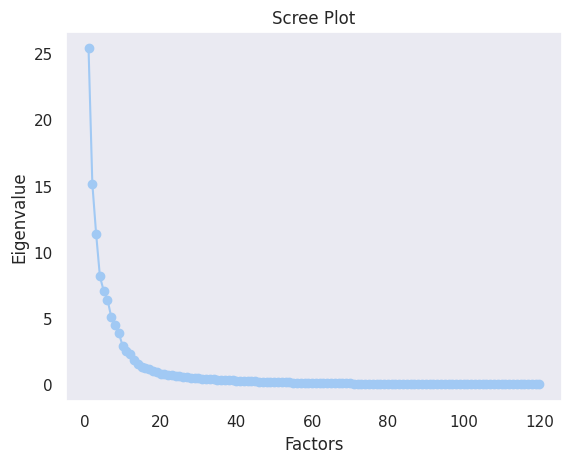

In [ ]:
# Create scree plot using matplotlib

plt.scatter(range(1,weather_df_result.shape[1]+1),ev)
plt.plot(range(1,weather_df_result.shape[1]+1),ev)

plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid()

plt.show()

=> y축 값의 크기가 1 이상인가로 판단함. 위의 카이저 기준과 비슷하게 대략 18정도임을 직관적으로 확인할 수 있음

### 3. 요인분석 수행 + 회전시키기

요인 방법의 회전 방법에는 직각회전과 비직각회전이 있으며, 직각 회전은 요인간에 상관이 없을 때, 비직각회전은 요인간에 상관이 있을 때 사용한다.

* SS Loadings (Sum of Squares Loadings): 각 요인이 설명하는 분산의 합계로, 이 값이 높을수록 해당 요인들이 데이터의 변동성을 많이 설명합니다.

* Proportion Variance: 각 요인이 설명하는 분산의 비율로, 전체 분산 대비 해당 요인의 비중을 나타냅니다.

* Cumulative Variance: 누적 분산 비율로, 첫 번째 요인부터 순차적으로 더해가며 누적된 분산의 비율을 표시합니다. 이를 통해 몇 개의 요인을 선택할지 결정하는 데 도움이 됩니다.

=> 일반적으로 누적 기여율이 85% 정도가 되는 부분까지만 주성분을 사용합니다.

(0) 회전시키지 않고 요인분석 수행

요인 분석을 할 때 유의해야할 점은 요인 회전을 통해서 해석력이 좋은 요인 적재량 행렬을 항상 얻을 수 있는 것은 아니며, 가능성이 있는 것임

In [ ]:
# 요인 분석 수행
fa_none = FactorAnalyzer(n_factors=18, rotation=None)
fa_none.fit(weather_df_result)

# 요인 로딩 추출
loadings = fa_none.loadings_
loadings_df = pd.DataFrame(loadings, index=weather_df_result.columns, columns=[f'Factor{i}' for i in range(1, 19)])
loadings_df

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18
1월 평균 기온(°C),0.826243,-0.013628,-0.426045,-0.021699,0.229877,-0.009727,-0.122943,-0.044444,0.037581,-0.009136,0.110125,-0.100436,-0.011184,-0.115781,0.034457,0.083349,0.041832,0.058561
2월 평균 기온(°C),0.810448,-0.067844,-0.388844,0.062778,0.029054,-0.024021,-0.197460,0.099051,0.041687,-0.094272,-0.038576,-0.182234,0.232609,0.034484,0.083018,0.010377,0.026469,0.039145
3월 평균 기온(°C),0.758529,-0.302415,-0.040284,0.444156,-0.139816,-0.118759,-0.087907,0.060904,-0.055005,-0.121307,0.017660,0.106265,0.068821,-0.029421,0.044197,0.013496,0.108094,0.006631
4월 평균 기온(°C),0.501831,-0.485269,0.551578,-0.031657,-0.137184,0.251579,0.084909,-0.033330,0.015358,-0.120426,-0.136483,-0.139304,0.012903,-0.006584,0.008820,0.068048,0.111604,-0.027016
5월 평균 기온(°C),0.570872,-0.455023,0.198788,-0.366670,0.329144,-0.048112,-0.016449,0.052091,0.077462,-0.044074,0.192486,0.117802,-0.053659,-0.072231,-0.026492,0.025887,0.120107,0.127950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8월 평균지면온도(°C),0.368654,-0.180301,0.192948,-0.180066,-0.368513,-0.217552,0.148425,0.391467,0.295749,0.058371,0.212835,0.262091,-0.183826,0.039326,0.105674,-0.096459,-0.039961,-0.014841
9월 평균지면온도(°C),0.545024,-0.233612,0.141406,-0.143597,0.059278,0.176851,0.143495,-0.093879,-0.193482,0.026309,0.213290,-0.038773,0.046632,0.192564,0.036816,-0.318548,-0.052903,-0.086737
10월 평균지면온도(°C),0.752961,-0.247440,-0.027465,0.024154,0.051632,0.114762,0.126092,-0.055924,-0.014585,-0.044296,0.057380,-0.232983,-0.194028,-0.002069,-0.020060,-0.188512,-0.130616,-0.081918
11월 평균지면온도(°C),0.832949,-0.094816,-0.140036,-0.180246,-0.146495,0.225560,-0.041927,0.132375,-0.107338,-0.107030,-0.074816,-0.038993,-0.100163,0.062926,0.111589,-0.052809,-0.073428,-0.051599


In [ ]:
# (1) 요인 분산 정보 가져오기
factor_variance0 = fa_none.get_factor_variance()

# 요인 분산 정보를 데이터프레임으로 변환
factor_variance_df0 = pd.DataFrame(factor_variance0, index=["SS Loadings", "Proportion Variance", "Cumulative Variance"]).T
factor_variance_df0

,SS Loadings,Proportion Variance,Cumulative Variance
0,25.294833,0.210790,0.210790
1,15.002270,0.125019,0.335809
2,11.249897,0.093749,0.429558
3,7.968562,0.066405,0.495963
4,6.916661,0.057639,0.553602
5,6.230992,0.051925,0.605527
6,4.929357,0.041078,0.646605
7,4.247262,0.035394,0.681999
8,3.659585,0.030497,0.712495
9,2.742381,0.022853,0.735348


(1) 요인의 수를 18개로 회전시키기

In [ ]:
# 요인 분석 수행
# rotation의 promax, varimax 해봤는데 promax 성능이 더 좋음
fa_varimax  = FactorAnalyzer(n_factors=18, rotation="promax")
fa_varimax.fit(weather_df_result)

# 요인 로딩 추출
loadings1 = fa_varimax.loadings_
loadings_df1 = pd.DataFrame(loadings1, index=weather_df_result.columns, columns=[f'Factor{i}' for i in range(1, 19)])
loadings_df1

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18
1월 평균 기온(°C),0.993849,0.039926,-0.223646,0.161420,-0.068854,-0.019762,-0.077135,-0.004391,0.203300,0.099305,0.008878,0.006826,-0.037006,0.019272,0.008154,-0.064768,0.077594,-0.135108
2월 평균 기온(°C),1.037036,-0.027077,-0.019060,-0.179637,-0.027788,-0.085398,-0.157639,-0.011620,0.125083,0.019417,0.084820,0.237159,0.092001,-0.117934,-0.058927,0.045483,-0.045439,-0.026197
3월 평균 기온(°C),0.633711,-0.011830,0.234823,-0.152757,0.138063,0.123013,0.080393,0.005020,0.130822,0.021583,0.244351,-0.165736,0.091761,-0.146189,-0.039532,0.006184,-0.063248,-0.146824
4월 평균 기온(°C),0.455984,0.049748,0.783386,0.072361,0.051445,-0.020754,-0.092626,0.019542,-0.034575,-0.087130,-0.089756,0.011203,0.190903,0.085732,-0.053889,0.040598,-0.131326,-0.059419
5월 평균 기온(°C),0.388831,0.022864,0.032341,0.549066,0.084083,0.083517,0.309944,-0.001176,0.000877,-0.066016,0.005633,0.065864,0.005165,0.050149,0.200190,0.026508,-0.047465,-0.328372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8월 평균지면온도(°C),-0.045517,-0.035341,0.114600,-0.069646,0.048073,-0.034620,0.905700,0.046649,-0.002707,-0.056139,-0.009446,-0.065524,0.011359,-0.039182,0.348564,-0.099021,-0.027278,0.003290
9월 평균지면온도(°C),0.394919,-0.055605,0.065640,0.148409,0.063498,-0.011539,-0.027727,0.009548,-0.140988,-0.039584,-0.031770,0.063758,-0.011058,-0.038627,0.419604,0.458716,-0.086602,0.060238
10월 평균지면온도(°C),0.774997,-0.012471,0.038445,-0.033663,0.067422,0.019347,-0.098700,0.003011,0.010305,-0.112504,-0.262165,0.007358,0.055568,0.021811,0.330259,0.140784,0.175161,0.050467
11월 평균지면온도(°C),0.905338,-0.011617,0.014190,-0.013380,-0.081263,-0.167043,0.047500,-0.013369,-0.251183,-0.104678,0.111340,0.037290,0.066684,-0.005769,0.124182,-0.007605,-0.028256,0.094605


In [ ]:
# (1) 요인 분산 정보 가져오기
factor_variance1 = fa_varimax.get_factor_variance()

# 요인 분산 정보를 데이터프레임으로 변환
factor_variance_df1 = pd.DataFrame(factor_variance1, index=["SS Loadings", "Proportion Variance", "Cumulative Variance"]).T
factor_variance_df1

,SS Loadings,Proportion Variance,Cumulative Variance
0,21.256157,0.177135,0.177135
1,14.696367,0.122470,0.299604
2,9.731459,0.081095,0.380700
3,6.128265,0.051069,0.431769
4,5.815562,0.048463,0.480232
5,5.568860,0.046407,0.526639
6,5.397015,0.044975,0.571614
7,5.294673,0.044122,0.615736
8,4.443399,0.037028,0.652765
9,4.407302,0.036728,0.689492


=> Cumulative Variance를 보았을 때 회전한 후에 성능이 더 높음. 원래 대부분 회전시켜야 성능이 더 높게 나온다고 함.

=> 일반적으로 자연과학에서는 누적 기여율이 80% 정도만 넘으면 된다고 함.따라서, 변수의 수를 더 줄이고자 요인의 수를 14개로 축소 (내생각)

(2) 요인의 수를 14개로

In [ ]:
# 요인 분석 수행
fa_none2  = FactorAnalyzer(n_factors=14, rotation="promax")
fa_none2.fit(weather_df_result)

# 요인 로딩 추출
loadings2 = fa_none2.loadings_
loadings_df2 = pd.DataFrame(loadings2, index=weather_df_result.columns, columns=[f'Factor{i}' for i in range(1, 15)])
loadings_df2

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14
1월 평균 기온(°C),0.948820,0.061449,-0.326897,-0.115266,0.030970,0.154254,-0.015920,-0.089751,0.012814,0.089130,-0.002835,-0.066394,0.020110,-0.141294
2월 평균 기온(°C),0.962003,-0.009917,-0.088884,0.227278,-0.026234,0.116446,-0.058922,-0.149120,-0.004630,0.002909,-0.335931,-0.173087,0.227046,-0.137033
3월 평균 기온(°C),0.615864,-0.009827,0.206511,0.185272,-0.051965,0.222512,0.100856,0.103727,0.016148,-0.268262,0.127034,-0.245858,0.092929,-0.012589
4월 평균 기온(°C),0.492943,0.046282,0.782926,-0.054291,-0.160822,-0.052025,-0.017012,-0.070045,0.010758,0.122350,-0.136401,-0.021977,0.023796,0.096640
5월 평균 기온(°C),0.452556,0.018564,0.005992,-0.555140,-0.274618,0.068811,0.217885,0.344664,0.015317,0.056195,0.022166,0.022468,0.037229,-0.033380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8월 평균지면온도(°C),-0.057605,-0.015274,0.130515,0.067710,0.041178,-0.010373,0.139690,0.945481,0.053198,0.033759,0.155637,0.035955,-0.153291,0.034308
9월 평균지면온도(°C),0.538548,-0.076605,0.218957,-0.224915,0.098141,-0.023315,0.066315,0.027311,0.009540,-0.147570,-0.071430,0.249532,0.320852,0.060932
10월 평균지면온도(°C),0.881072,-0.023397,0.154855,-0.029419,0.014147,0.106435,0.040478,-0.095738,0.009046,0.098957,-0.016547,0.220090,-0.082181,0.071877
11월 평균지면온도(°C),0.866613,0.012909,-0.011673,0.022667,-0.044832,-0.241472,-0.151380,0.058306,-0.015158,-0.105411,-0.091716,0.031893,-0.062309,-0.014162


In [ ]:
plt.rc('font', family='NanumGothic') #matplotlib 한글 깨짐 방지

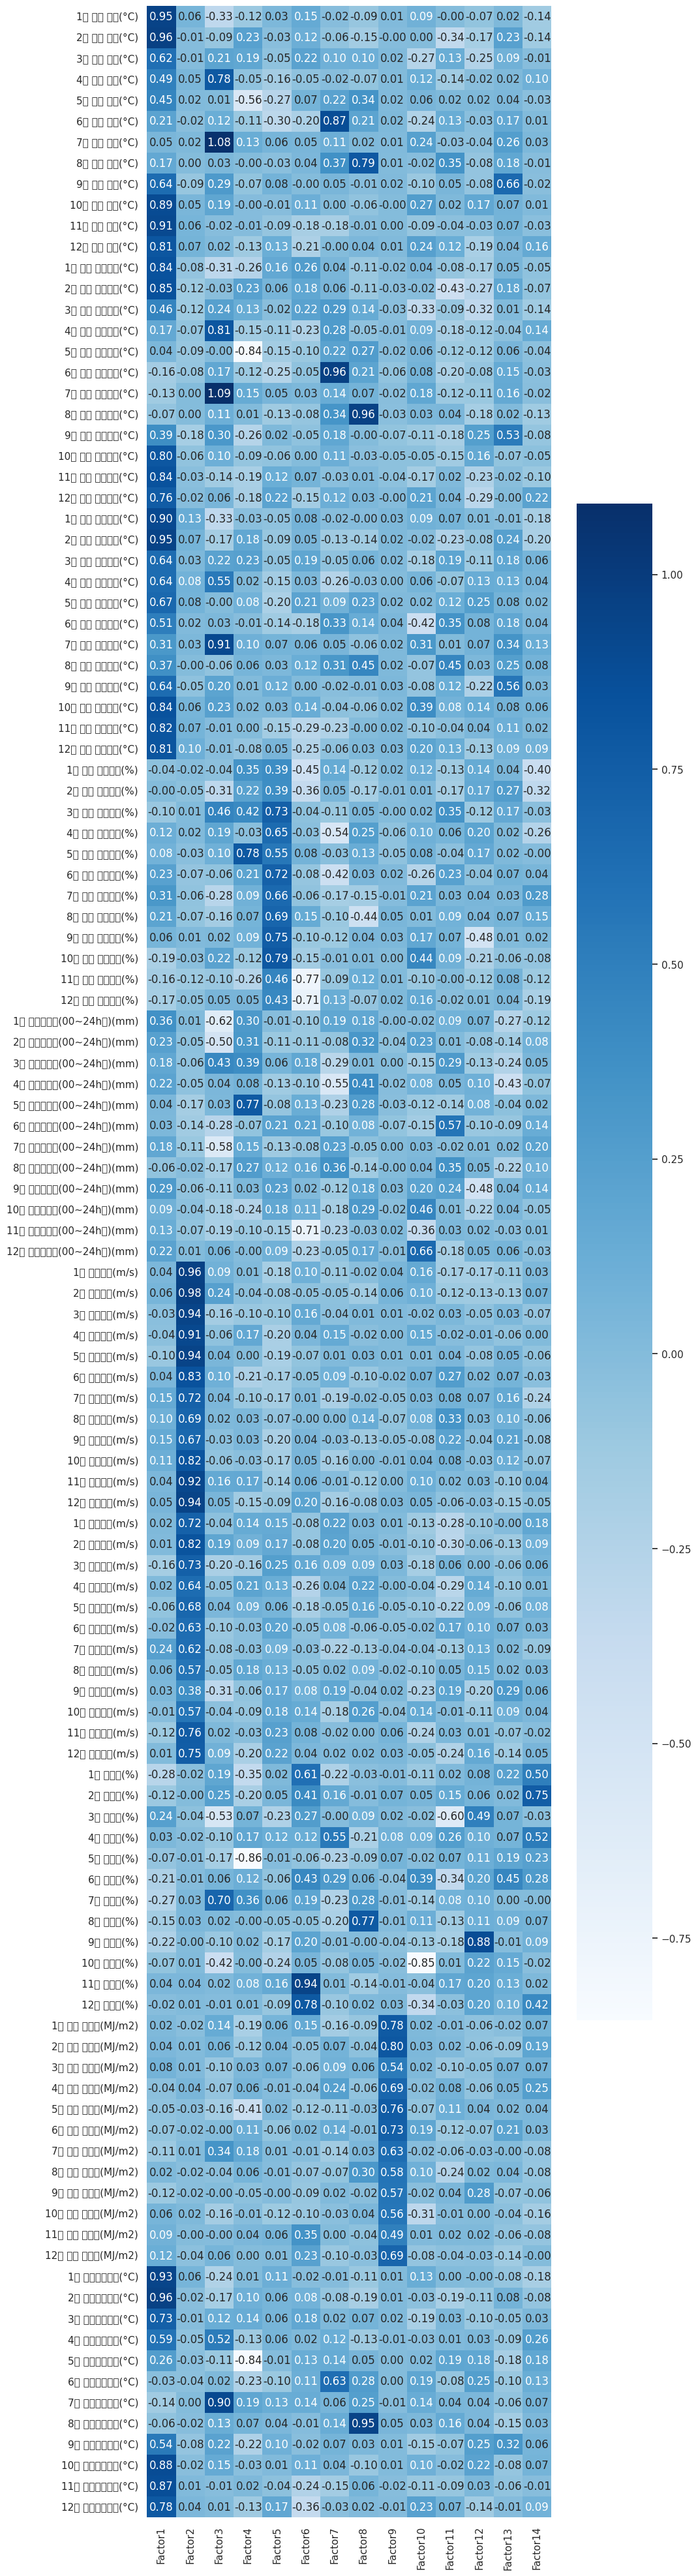

In [ ]:
# (0) loadings의 시각화
plt.figure(figsize=(10,50))
sns.heatmap(loadings_df2, cmap="Blues", annot=True, fmt='.2f')
plt.show()

In [ ]:
# 각 요인의 주요 변수 살펴보기
for i in range(14):
    sorted_loadings = loadings_df2.iloc[:, i].abs().sort_values(ascending=False)
    print('factor', i+1)
    col = f'Factor{i+1}'
    print(loadings_df2.loc[sorted_loadings.index, col][:12])
    print(loadings_df2.loc[sorted_loadings.index, col][:12].index)
    print('            ')

factor 1
2월 평균 기온(°C)      0.962003
2월 평균지면온도(°C)     0.959436
1월 평균 기온(°C)      0.948820
2월 평균 최저기온(°C)    0.947361
1월 평균지면온도(°C)     0.933774
11월 평균 기온(°C)     0.906648
1월 평균 최저기온(°C)    0.904624
10월 평균 기온(°C)     0.890222
10월 평균지면온도(°C)    0.881072
11월 평균지면온도(°C)    0.866613
2월 평균 최고기온(°C)    0.847099
1월 평균 최고기온(°C)    0.838444
Name: Factor1, dtype: float64
Index(['2월 평균 기온(°C)', '2월 평균지면온도(°C)', '1월 평균 기온(°C)', '2월 평균 최저기온(°C)',
       '1월 평균지면온도(°C)', '11월 평균 기온(°C)', '1월 평균 최저기온(°C)', '10월 평균 기온(°C)',
       '10월 평균지면온도(°C)', '11월 평균지면온도(°C)', '2월 평균 최고기온(°C)', '1월 평균 최고기온(°C)'],
      dtype='object')
            
factor 2
2월 평균풍속(m/s)     0.976242
1월 평균풍속(m/s)     0.963665
3월 평균풍속(m/s)     0.944444
5월 평균풍속(m/s)     0.942659
12월 평균풍속(m/s)    0.939017
11월 평균풍속(m/s)    0.916366
4월 평균풍속(m/s)     0.913352
6월 평균풍속(m/s)     0.832632
2월 최대풍속(m/s)     0.823923
10월 평균풍속(m/s)    0.817214
11월 최대풍속(m/s)    0.757153
12월 최대풍속(m/s)    0.753769
Name: Factor2, dtype: float64
Index(['2월 평균풍속(m/s)'

=> Factor 1인 경우, 11월의 평균 기온, 평균 최저기온, 지면 온도, 평균 최고 기온 등에 영향을 받음

이런 식으로 아래 그림과 같이 각 요인의 주요 변수를 살펴보고 공통점을 찾아 요인 명칭을 정해주면 됨

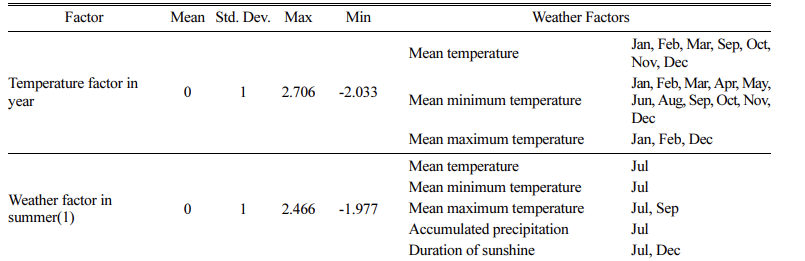

In [ ]:
# (1) 요인 분산 정보 가져오기
## 사회과학에서는 60%, 자연과학에서는 80% 이상의 누적 분산을 가지도록 해야
factor_variance2 = fa_none2.get_factor_variance()

# 요인 분산 정보를 데이터프레임으로 변환
factor_variance_df2 = pd.DataFrame(factor_variance2, index=["SS Loadings", "Proportion Variance", "Cumulative Variance"]).T
factor_variance_df2

,SS Loadings,Proportion Variance,Cumulative Variance
0,21.706149,0.180885,0.180885
1,14.678795,0.122323,0.303208
2,10.457811,0.087148,0.390356
3,6.442627,0.053689,0.444045
4,6.382354,0.053186,0.497231
5,6.253896,0.052116,0.549347
6,5.709281,0.047577,0.596924
7,5.420613,0.045172,0.642096
8,5.305914,0.044216,0.686312
9,4.219999,0.035167,0.721479


In [ ]:
# (2) 공통성 구하기 - 각 변수의 요인 적재값의 제곱합 의미 , 각 변수로부터 추출된 요인에 의해 설명되는 비율
## 보통 0.5 이상이면 충분한 공통성을 가진다고 판단함
pd.DataFrame(fa_none2.get_communalities(), index=weather_df_result.columns)

,0
1월 평균 기온(°C),1.090139
2월 평균 기온(°C),1.238228
3월 평균 기온(°C),0.687104
4월 평균 기온(°C),0.938901
5월 평균 기온(°C),0.766674
...,...
8월 평균지면온도(°C),0.994581
9월 평균지면온도(°C),0.605645
10월 평균지면온도(°C),0.894521
11월 평균지면온도(°C),0.863322


In [ ]:
'''
# (3) 요인 점수 구하기 - 요인 분석 결과로 각각의 사례가 추출된 요인을 반영하는 점수
matrix1 = weather_df_result.values
matrix2 = loadings_df2.values

# 두 행렬의 곱셈 계산
result_matrix = np.dot(matrix1, matrix2)
result_df = pd.DataFrame(result_matrix, columns=loadings_df2.columns)

# 인덱스 설정
result_df['월'] = weather_df_result.index.get_level_values('월')
result_df['연도'] = weather_df_result.index.get_level_values('연도')
result_df['지점명'] = weather_df_result.index.get_level_values('지점명')


result_df
'''

"\n# (3) 요인 점수 구하기 - 요인 분석 결과로 각각의 사례가 추출된 요인을 반영하는 점수\nmatrix1 = weather_df_result.values\nmatrix2 = loadings_df2.values\n\n# 두 행렬의 곱셈 계산\nresult_matrix = np.dot(matrix1, matrix2)\nresult_df = pd.DataFrame(result_matrix, columns=loadings_df2.columns)\n\n# 인덱스 설정\nresult_df['월'] = weather_df_result.index.get_level_values('월')\nresult_df['연도'] = weather_df_result.index.get_level_values('연도')\nresult_df['지점명'] = weather_df_result.index.get_level_values('지점명')\n\n\nresult_df\n"

In [ ]:
weather_df_result

1월 평균 기온(°C)  2월 평균 기온(°C)  3월 평균 기온(°C)  4월 평균 기온(°C)  \
월  연도 지점명                                                           
8  15 북춘천  3.301012e-17  1.650506e-17  8.252529e-17  4.951517e-17   
9  15 북춘천  3.301012e-17  1.650506e-17  8.252529e-17  4.951517e-17   
10 15 북춘천  3.301012e-17  1.650506e-17  8.252529e-17  4.951517e-17   
8  16 북춘천  3.301012e-17  1.650506e-17  8.252529e-17  4.951517e-17   
9  16 북춘천  3.301012e-17  1.650506e-17  8.252529e-17  4.951517e-17   
...                 ...           ...           ...           ...   
   21 남해   1.017911e+00  1.822979e+00  1.868832e+00  8.931632e-01   
10 21 남해   1.017911e+00  1.822979e+00  1.868832e+00  8.931632e-01   
8  22 남해   1.058458e+00  3.943126e-01  1.307073e+00  1.313160e+00   
9  22 남해   1.058458e+00  3.943126e-01  1.307073e+00  1.313160e+00   
10 22 남해   1.058458e+00  3.943126e-01  1.307073e+00  1.313160e+00   

           5월 평균 기온(°C)  6월 평균 기온(°C)  7월 평균 기온(°C)  8월 평균 기온(°C)  \
월  연도 지점명                                                           
8  15 북춘천 -3.952961e-15  1.043454e-15 -9.150929e-16 -1.304318e-15   
9  15 북춘천 -3.952961e-15  1.043454e-15 -9.150929e-16 -1.304318e-15   
10 15 북춘천 -3.952961e-15  1.043454e-15 -9.150929e-16 -1.304318e-15   
8  16 북춘천 -3.952961e-15  1.043454e-15 -9.150929e-16 -1.304318e-15   
9  16 북춘천 -3.952961e-15  1.043454e-15 -9.150929e-16 -1.304318e-15   
...                 ...           ...           ...           ...   
   21 남해   1.136856e-01 -1.130164e-01  4.056237e-01  2.537534e-02   
10 21 남해   1.136856e-01 -1.130164e-01  4.056237e-01  2.537534e-02   
8  22 남해   8.615998e-01  1.186875e-01  6.081994e-01  1.903151e-01   
9  22 남해   8.615998e-01  1.186875e-01  6.081994e-01  1.903151e-01   
10 22 남해   8.615998e-01  1.186875e-01  6.081994e-01  1.903151e-01   

           9월 평균 기온(°C)  10월 평균 기온(°C)  ...  3월 평균지면온도(°C)  4월 평균지면온도(°C)  \
월  연도 지점명                               ...                                 
8  15 북춘천  3.229740e-16  -6.602023e-16  ...   2.475759e-16   1.490649e-16   
9  15 북춘천  3.229740e-16  -6.602023e-16  ...   2.475759e-16   1.490649e-16   
10 15 북춘천  3.229740e-16  -6.602023e-16  ...   2.475759e-16   1.490649e-16   
8  16 북춘천  3.229740e-16  -6.602023e-16  ...   2.475759e-16   1.490649e-16   
9  16 북춘천  3.229740e-16  -6.602023e-16  ...   2.475759e-16   1.490649e-16   
...                 ...            ...  ...            ...            ...   
   21 남해   9.943269e-01   6.485191e-01  ...   1.539421e+00   1.199947e+00   
10 21 남해   9.943269e-01   1.362975e+00  ...   1.539421e+00   1.199947e+00   
8  22 남해   9.943269e-01   1.362975e+00  ...   1.429285e+00   1.946136e+00   
9  22 남해   9.145203e-01   1.362975e+00  ...   1.429285e+00   1.946136e+00   
10 22 남해   9.145203e-01   8.683517e-01  ...   1.429285e+00   1.946136e+00   

           5월 평균지면온도(°C)  6월 평균지면온도(°C)  7월 평균지면온도(°C)  8월 평균지면온도(°C)  \
월  연도 지점명                                                               
8  15 북춘천   2.240562e-15  -2.742446e-16   1.240333e-15   7.618873e-16   
9  15 북춘천   2.240562e-15  -2.742446e-16   1.240333e-15   7.618873e-16   
10 15 북춘천   2.240562e-15  -2.742446e-16   1.240333e-15   7.618873e-16   
8  16 북춘천   2.240562e-15  -2.742446e-16   1.240333e-15   7.618873e-16   
9  16 북춘천   2.240562e-15  -2.742446e-16   1.240333e-15   7.618873e-16   
...                  ...            ...            ...            ...   
   21 남해   -3.404317e-01  -6.103427e-01   9.896682e-01   5.274871e-01   
10 21 남해   -3.404317e-01  -6.103427e-01   9.896682e-01   5.274871e-01   
8  22 남해    2.088366e+00  -5.437731e-02   2.556267e-01  -4.792617e-01   
9  22 남해    2.088366e+00  -5.437731e-02   2.556267e-01  -4.792617e-01   
10 22 남해    2.088366e+00  -5.437731e-02   2.556267e-01  -4.792617e-01   

           9월 평균지면온도(°C)  10월 평균지면온도(°C)  11월 평균지면온도(°C)  12월 평균지면온도(°C)  
월  연도 지점명                                                                 
8  15 북춘천   1.705965e-15    9.820509e-16   -9.903035e-17    4.951517e-17  
9  15 북춘천   1.705965e-15    9.820509e-

In [49]:
result_df = pd.DataFrame()
result_df['1_2월 온도'] = weather_df_result[['2월 평균 기온(°C)', '2월 평균지면온도(°C)', '1월 평균 기온(°C)', '2월 평균 최저기온(°C)', '1월 평균지면온도(°C)']].mean(axis=1)
result_df['평균풍속'] = weather_df_result[['2월 평균풍속(m/s)', '1월 평균풍속(m/s)', '3월 평균풍속(m/s)', '5월 평균풍속(m/s)', '12월 평균풍속(m/s)', '11월 평균풍속(m/s)', '4월 평균풍속(m/s)']].mean(axis=1)
result_df['7월의 기온'] = weather_df_result[['7월 평균 최고기온(°C)', '7월 평균 기온(°C)', '7월 평균 최저기온(°C)', '7월 평균지면온도(°C)']].mean(axis=1)
result_df['5월의 기온'] = weather_df_result[['5월 일조율(%)', '5월 평균지면온도(°C)', '5월 평균 최고기온(°C)']].mean(axis=1)
result_df['평균 상대 습도'] = weather_df_result[['10월 평균 상대습도(%)', '9월 평균 상대습도(%)', '3월 평균 상대습도(%)', '6월 평균 상대습도(%)', '8월 평균 상대습도(%)', '7월 평균 상대습도(%)', '4월 평균 상대습도(%)', '5월 평균 상대습도(%)']].mean(axis=1)
result_df['11월_12월 일조율'] = weather_df_result[['11월 일조율(%)', '12월 일조율(%)']].mean(axis=1)
result_df['6월 기온'] = weather_df_result[['6월 평균 최고기온(°C)', '6월 평균 기온(°C)', '6월 평균지면온도(°C)']].mean(axis=1)
result_df['8월 온도'] = weather_df_result[['8월 평균 최고기온(°C)', '8월 평균지면온도(°C)', '8월 평균 기온(°C)', '8월 일조율(%)']].mean(axis=1)
result_df['합계일사량'] = weather_df_result[['2월 합계 일사량(MJ/m2)', '1월 합계 일사량(MJ/m2)', '5월 합계 일사량(MJ/m2)','6월 합계 일사량(MJ/m2)',  '12월 합계 일사량(MJ/m2)', '4월 합계 일사량(MJ/m2)','7월 합계 일사량(MJ/m2)', '8월 합계 일사량(MJ/m2)',  '9월 합계 일사량(MJ/m2)','10월 합계 일사량(MJ/m2)','3월 합계 일사량(MJ/m2)', '11월 합계 일사량(MJ/m2)']].mean(axis=1)
result_df['10_12월 월합강수량'] = weather_df_result[['12월 월합강수량(00~24h만)(mm)', '10월 월합강수량(00~24h만)(mm)']].mean(axis=1)
result_df['기타'] = weather_df_result[['3월 일조율(%)', '6월 월합강수량(00~24h만)(mm)', '8월 평균 최저기온(°C)','2월 평균 최고기온(°C)']].mean(axis=1)
result_df['9월 일조율'] = weather_df_result[['9월 일조율(%)']].mean(axis=1)
result_df['9월 온도'] = weather_df_result[['9월 평균 기온(°C)', '9월 평균 최저기온(°C)', '9월 평균 최고기온(°C)']].mean(axis=1)
result_df['12_1_2_4월 일조율'] = weather_df_result[['2월 일조율(%)', '4월 일조율(%)', '1월 일조율(%)', '12월 일조율(%)']].mean(axis=1)

In [53]:
result_df['월'] = weather_df_result.index.get_level_values('월')
result_df['연도'] = weather_df_result.index.get_level_values('연도')
result_df['지점명'] = weather_df_result.index.get_level_values('지점명')

fuji_df_factor = result_df.reset_index(drop=True)
fuji_df_factor

,1_2월 온도,평균풍속,7월의 기온,5월의 기온,평균 상대 습도,11월_12월 일조율,6월 기온,8월 온도,합계일사량,10_12월 월합강수량,기타,9월 일조율,9월 온도,12_1_2_4월 일조율,월,연도,지점명
0,3.298703e-17,-2.831664e-16,-3.110204e-16,1.429063e-15,3.730446e-16,4.538891e-17,1.211407e-16,-1.625222e-16,1.129854e-16,-1.361667e-16,7.096453e-16,-3.312554e-16,-3.533390e-16,-8.252529e-17,8,15,북춘천
1,3.298703e-17,-2.831664e-16,-3.110204e-16,1.429063e-15,3.730446e-16,4.538891e-17,1.211407e-16,-1.625222e-16,1.129854e-16,-1.361667e-16,7.096453e-16,-3.312554e-16,-3.533390e-16,-8.252529e-17,9,15,북춘천
2,3.298703e-17,-2.831664e-16,-3.110204e-16,1.429063e-15,3.730446e-16,4.538891e-17,1.211407e-16,-1.625222e-16,1.129854e-16,-1.361667e-16,7.096453e-16,-3.312554e-16,-3.533390e-16,-8.252529e-17,10,15,북춘천
3,3.298703e-17,-2.831664e-16,-3.110204e-16,1.429063e-15,3.730446e-16,4.538891e-17,1.211407e-16,-1.625222e-16,1.129854e-16,-1.361667e-16,7.096453e-16,-3.312554e-16,-3.533390e-16,-8.252529e-17,8,16,북춘천
4,3.298703e-17,-2.831664e-16,-3.110204e-16,1.429063e-15,3.730446e-16,4.538891e-17,1.211407e-16,-1.625222e-16,1.129854e-16,-1.361667e-16,7.096453e-16,-3.312554e-16,-3.533390e-16,-8.252529e-17,9,16,북춘천
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,1.501163e+00,-3.066487e-01,5.508980e-01,-7.789182e-01,2.114525e-01,3.557807e-01,-6.015777e-01,-4.705783e-02,1.129854e-16,-7.881903e-01,4.313276e-01,-1.746782e+00,5.819023e-01,1.055215e-01,9,21,남해
884,1.501163e+00,-3.066487e-01,5.508980e-01,-7.789182e-01,3.895681e-01,3.557807e-01,-6.015777e-01,-4.705783e-02,1.129854e-16,-6.841206e-01,4.313276e-01,-1.746782e+00,5.819023e-01,1.055215e-01,10,21,남해
885,9.216791e-01,-2.554772e-01,4.726185e-01,1.068019e+00,1.950793e-01,4.318842e-01,-4.552784e-01,-5.664494e-01,1.129854e-16,-9.394930e-01,-9.891264e-02,-1.746782e+00,5.819023e-01,6.048385e-01,8,22,남해
886,9.216791e-01,-2.554772e-01,4.726185e-01,1.068019e+00,5.850476e-02,4.318842e-01,-4.552784e-01,-5.664494e-01,1.129854e-16,-9.394930e-01,-9.891264e-02,-3.740573e-01,6.768221e-01,6.048385e-01,9,22,남해


### 모델 돌려보기

In [54]:
fuji_df_fa

,조사일,과원이름,품질
0,2015-11-02,김제,2등급
1,2015-11-02,김제,2등급
2,2015-11-02,김제,4등급
3,2015-11-02,김제,2등급
4,2015-11-02,김제,1등급
...,...,...,...
707,2022-10-27,포천,3등급
708,2022-10-27,포천,2등급
709,2022-10-27,포천,3등급
710,2022-10-27,포천,2등급


In [55]:
# 홍로 프레임에 '기상지점' 칼럼 추가 (과원에 따라 가까운 기상 관측지점임) + 이제는 과원이름을 안 보고 기상지점만 봐도 됨. 어차피 날씨를 가져다 붙이는 거라서 기상지점이 기준임!그래서 밑에 다 기상지점으로 조건문작성함
fuji_df_fa['기상지점'] = fuji_df_fa['과원이름'].map({
    '화성': '수원',
    '포천': '동두천',
    '김제': '전주',
    '완주': '전주',
    '남해': '남해',
    '충주': '충주',
    '춘천': '북춘천',
    '군위': '대구'
})

fuji_df_fa

,조사일,과원이름,품질,기상지점
0,2015-11-02,김제,2등급,전주
1,2015-11-02,김제,2등급,전주
2,2015-11-02,김제,4등급,전주
3,2015-11-02,김제,2등급,전주
4,2015-11-02,김제,1등급,전주
...,...,...,...,...
707,2022-10-27,포천,3등급,동두천
708,2022-10-27,포천,2등급,동두천
709,2022-10-27,포천,3등급,동두천
710,2022-10-27,포천,2등급,동두천


In [56]:
result_df

,1_2월 온도,평균풍속,7월의 기온,5월의 기온,평균 상대 습도,11월_12월 일조율,6월 기온,8월 온도,합계일사량,10_12월 월합강수량,기타,9월 일조율,9월 온도,12_1_2_4월 일조율,월,연도,지점명
0,3.298703e-17,-2.831664e-16,-3.110204e-16,1.429063e-15,3.730446e-16,4.538891e-17,1.211407e-16,-1.625222e-16,1.129854e-16,-1.361667e-16,7.096453e-16,-3.312554e-16,-3.533390e-16,-8.252529e-17,8,15,북춘천
1,3.298703e-17,-2.831664e-16,-3.110204e-16,1.429063e-15,3.730446e-16,4.538891e-17,1.211407e-16,-1.625222e-16,1.129854e-16,-1.361667e-16,7.096453e-16,-3.312554e-16,-3.533390e-16,-8.252529e-17,9,15,북춘천
2,3.298703e-17,-2.831664e-16,-3.110204e-16,1.429063e-15,3.730446e-16,4.538891e-17,1.211407e-16,-1.625222e-16,1.129854e-16,-1.361667e-16,7.096453e-16,-3.312554e-16,-3.533390e-16,-8.252529e-17,10,15,북춘천
3,3.298703e-17,-2.831664e-16,-3.110204e-16,1.429063e-15,3.730446e-16,4.538891e-17,1.211407e-16,-1.625222e-16,1.129854e-16,-1.361667e-16,7.096453e-16,-3.312554e-16,-3.533390e-16,-8.252529e-17,8,16,북춘천
4,3.298703e-17,-2.831664e-16,-3.110204e-16,1.429063e-15,3.730446e-16,4.538891e-17,1.211407e-16,-1.625222e-16,1.129854e-16,-1.361667e-16,7.096453e-16,-3.312554e-16,-3.533390e-16,-8.252529e-17,9,16,북춘천
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,1.501163e+00,-3.066487e-01,5.508980e-01,-7.789182e-01,2.114525e-01,3.557807e-01,-6.015777e-01,-4.705783e-02,1.129854e-16,-7.881903e-01,4.313276e-01,-1.746782e+00,5.819023e-01,1.055215e-01,9,21,남해
884,1.501163e+00,-3.066487e-01,5.508980e-01,-7.789182e-01,3.895681e-01,3.557807e-01,-6.015777e-01,-4.705783e-02,1.129854e-16,-6.841206e-01,4.313276e-01,-1.746782e+00,5.819023e-01,1.055215e-01,10,21,남해
885,9.216791e-01,-2.554772e-01,4.726185e-01,1.068019e+00,1.950793e-01,4.318842e-01,-4.552784e-01,-5.664494e-01,1.129854e-16,-9.394930e-01,-9.891264e-02,-1.746782e+00,5.819023e-01,6.048385e-01,8,22,남해
886,9.216791e-01,-2.554772e-01,4.726185e-01,1.068019e+00,5.850476e-02,4.318842e-01,-4.552784e-01,-5.664494e-01,1.129854e-16,-9.394930e-01,-9.891264e-02,-3.740573e-01,6.768221e-01,6.048385e-01,9,22,남해


In [57]:
# 처리할 지점들의 리스트
locations = ['전주', '북춘천', '동두천', '수원', '충주', '대구', '남해']

# 결과를 저장할 빈 리스트
df_result_list = []

# 각 지점에 대한 처리를 반복
for location in locations:

    # 해당 지점의 기상 데이터 추출
    location_weather = result_df[result_df['지점명'] == location]
    location_weather.reset_index(drop=True, inplace=True)

    #해당 지점 (타겟이 있는) 데이터프레임 추출
    location_df = fuji_df_fa[fuji_df_fa['기상지점'] == location]
    location_df['조사일'] = pd.to_datetime(location_df['조사일'])  # 데이트타임으로 변환
    location_df.drop('기상지점', axis=1, inplace=True)
    location_df.reset_index(drop=True, inplace=True)  # 인덱스 초기화!

    n = len(location_df)

    for i in range(n):
        year = int(str(location_df['조사일'][i])[2:4])
        month = int(str(location_df['조사일'][i])[5:7])
        day = int(str(location_df['조사일'][i])[8:10])

        #15일 전에는 '조사일'에 해당하는 월 제외
        if day <= 15:
          month = month - 1
        else:
          month = month

        data1 = location_df.iloc[i].values
        data2 = location_weather[(location_weather['월'] == month) & (location_weather['연도'] == year)]
        data2.drop(['월','연도','지점명'], axis=1, inplace=True)
        data2 = data2.values[0]

        df_result = np.concatenate((data1,data2))
        df_result_list.append(df_result)

# 모든 결과를 하나의 데이터프레임으로 병합
final_df_result = pd.DataFrame(df_result_list)

In [58]:
#칼럼명 변경
new_column_names = ['조사일', '과원이름', '품질', '1,2월 온도', '평균풍속', '7월의 기온', '5월의 기온',
                    '평균 상대 습도', '11월,12월 일조율','6월 기온', '8월 온도', '합계일사량', '10,12월 월합강수량',
                    '기타', '9월 일조율', '9월 온도','12,1,2,4월 일조율']

# 데이터프레임의 칼럼 이름을 바꿔줌
final_df_result.columns = new_column_names

In [59]:
fuji_df_factor = final_df_result.copy()
fuji_df_factor

,조사일,과원이름,품질,"1,2월 온도",평균풍속,7월의 기온,5월의 기온,평균 상대 습도,"11월,12월 일조율",6월 기온,8월 온도,합계일사량,"10,12월 월합강수량",기타,9월 일조율,9월 온도,"12,1,2,4월 일조율"
0,2015-11-02,김제,2등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,-0.029595,1.423079e-01,0.437431,0.190869,1.612986,0.479442,-1.248027
1,2015-11-02,김제,2등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,-0.029595,1.423079e-01,0.437431,0.190869,1.612986,0.479442,-1.248027
2,2015-11-02,김제,4등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,-0.029595,1.423079e-01,0.437431,0.190869,1.612986,0.479442,-1.248027
3,2015-11-02,김제,2등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,-0.029595,1.423079e-01,0.437431,0.190869,1.612986,0.479442,-1.248027
4,2015-11-02,김제,1등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,-0.029595,1.423079e-01,0.437431,0.190869,1.612986,0.479442,-1.248027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,2019-10-24,남해,4등급,1.425007,-1.024354,-0.315572,0.565726,-0.060790,0.327367,-0.647503,0.570364,1.129854e-16,1.510666,1.550850,-1.101309,1.219186,0.007259
708,2019-10-24,남해,4등급,1.425007,-1.024354,-0.315572,0.565726,-0.060790,0.327367,-0.647503,0.570364,1.129854e-16,1.510666,1.550850,-1.101309,1.219186,0.007259
709,2019-10-24,남해,4등급,1.425007,-1.024354,-0.315572,0.565726,-0.060790,0.327367,-0.647503,0.570364,1.129854e-16,1.510666,1.550850,-1.101309,1.219186,0.007259
710,2019-10-24,남해,4등급,1.425007,-1.024354,-0.315572,0.565726,-0.060790,0.327367,-0.647503,0.570364,1.129854e-16,1.510666,1.550850,-1.101309,1.219186,0.007259


In [60]:
# 값이 제대로 들어갔는지 확인, 전주만 가지고 봤는데 일치~
print(result_df[result_df['지점명']=="전주"]) # weather에서 요인분석 후 데이터프레임
print(fuji_df_factor[fuji_df_factor['과원이름']=="김제"]) # 우리가 사용할 사과 데이터프레임

      1_2월 온도      평균풍속    7월의 기온    5월의 기온  평균 상대 습도  11월_12월 일조율     6월 기온  \
216  0.686936 -0.509864 -0.363468  0.982024 -0.492283    -0.502292  0.384935   
217  0.686936 -0.509864 -0.363468  0.982024 -0.537807    -0.502292  0.384935   
218  0.686936 -0.509864 -0.363468  0.982024 -0.426485    -0.502292  0.384935   
219  0.202766  0.267724  0.745970  0.379686  0.160547    -1.932580  0.040680   
220  0.202766  0.267724  0.745970  0.379686  0.319884    -1.932580  0.040680   
221  0.202766  0.267724  0.745970  0.379686  0.408942    -1.932580  0.040680   
222  0.247347  0.324045  1.093288  0.714640  0.235578    -0.203301  0.832331   
223  0.247347  0.324045  1.093288  0.714640  0.190053    -0.203301  0.832331   
224  0.247347  0.324045  1.093288  0.714640  0.167788    -0.203301  0.832331   
225 -0.479183  0.216175  1.704184 -0.430661  0.812002     0.310535  1.223425   
226 -0.479183  0.216175  1.704184 -0.430661  0.903051     0.310535  1.223425   
227 -0.479183  0.216175  1.704184 -0.430

# 태풍 칼럼 추가

-> 태풍은 수확기에 가까운 태풍에만 영향을 받으므로 작년 수확기 이후의 태풍은 고려하지 않음. 즉, 당해 연도의 태풍 발생만 고려함.

* 연도별 발생 횟수:

    2015: 4

    2016: 2

    2017: 3

    2018: 5

    2019: 7

    2020: 4

    2021: 3

    2022: 5

* 태풍평균강도는 각 태풍의 최대 풍속을 구하고 당해 연도 발생 횟수로 나누어 평균 최대 풍속을 구한 것임

In [61]:
# 조사일에서 연도 추출
fuji_df_factor['조사연도'] = 0
for i in range(len(fuji_df_factor)):
    fuji_df_factor['조사연도'].iloc[i] = fuji_df_factor['조사일'].iloc[i].year

fuji_df_factor.head()

,조사일,과원이름,품질,"1,2월 온도",평균풍속,7월의 기온,5월의 기온,평균 상대 습도,"11월,12월 일조율",6월 기온,8월 온도,합계일사량,"10,12월 월합강수량",기타,9월 일조율,9월 온도,"12,1,2,4월 일조율",조사연도
0,2015-11-02,김제,2등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,-0.029595,0.142308,0.437431,0.190869,1.612986,0.479442,-1.248027,2015
1,2015-11-02,김제,2등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,-0.029595,0.142308,0.437431,0.190869,1.612986,0.479442,-1.248027,2015
2,2015-11-02,김제,4등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,-0.029595,0.142308,0.437431,0.190869,1.612986,0.479442,-1.248027,2015
3,2015-11-02,김제,2등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,-0.029595,0.142308,0.437431,0.190869,1.612986,0.479442,-1.248027,2015
4,2015-11-02,김제,1등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,-0.029595,0.142308,0.437431,0.190869,1.612986,0.479442,-1.248027,2015


In [62]:
# 2015~2022년 태풍횟수와 태풍평균강도 칼럼 생성
fuji_df_factor['태풍횟수'] = fuji_df_factor['조사연도'].map({
        2015: 4,
        2016: 2,
        2017: 3,
        2018: 5,
        2019: 7,
        2020: 4,
        2021: 3,
        2022: 5
})

fuji_df_factor['태풍평균강도'] = fuji_df_factor['조사연도'].map({
        2015: 54.25,
        2016: 49.5,
        2017: 41,
        2018: 40.2,
        2019: 38.57,
        2020: 42,
        2021: 34,
        2022: 33.6
})

# 폭염 일수 칼럼 추가

: 지역 별로 각 수확년도에 체감온도가 33도 이상이었던 날 횟수

In [63]:
# hot_dict
hot_dict = {
    '충주': [12, 28, 12, 37, 16, 6, 16, 10],
    '김제': [17, 39, 29, 48, 32, 25, 24, 22],
    '완주': [17, 39, 29, 48, 32, 25, 24, 22],
    '남해': [13, 37, 35, 42, 22, 14, 14, 9],
    '포천': [8, 31, 17, 36, 17, 9, 25, 15],
    '화성': [17, 37, 25, 41, 20, 14, 27, 17],
    '군위': [16, 29, 28, 35, 22, 29, 17, 39],
    '춘천': [None, None, 14, 29, 15, 10, 24, 16]
}

for region in hot_dict.keys():
    hot_list = hot_dict[region]
    for year, hot_days in zip(range(2015, 2023), hot_list):
        fuji_df_factor.loc[(fuji_df_factor['과원이름'] == region) & (fuji_df_factor['조사연도'] == year), '폭염일수'] = hot_days

In [64]:
fuji_df_factor

,조사일,과원이름,품질,"1,2월 온도",평균풍속,7월의 기온,5월의 기온,평균 상대 습도,"11월,12월 일조율",6월 기온,...,합계일사량,"10,12월 월합강수량",기타,9월 일조율,9월 온도,"12,1,2,4월 일조율",조사연도,태풍횟수,태풍평균강도,폭염일수
0,2015-11-02,김제,2등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,...,1.423079e-01,0.437431,0.190869,1.612986,0.479442,-1.248027,2015,4,54.25,17.0
1,2015-11-02,김제,2등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,...,1.423079e-01,0.437431,0.190869,1.612986,0.479442,-1.248027,2015,4,54.25,17.0
2,2015-11-02,김제,4등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,...,1.423079e-01,0.437431,0.190869,1.612986,0.479442,-1.248027,2015,4,54.25,17.0
3,2015-11-02,김제,2등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,...,1.423079e-01,0.437431,0.190869,1.612986,0.479442,-1.248027,2015,4,54.25,17.0
4,2015-11-02,김제,1등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,...,1.423079e-01,0.437431,0.190869,1.612986,0.479442,-1.248027,2015,4,54.25,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,2019-10-24,남해,4등급,1.425007,-1.024354,-0.315572,0.565726,-0.060790,0.327367,-0.647503,...,1.129854e-16,1.510666,1.550850,-1.101309,1.219186,0.007259,2019,7,38.57,22.0
708,2019-10-24,남해,4등급,1.425007,-1.024354,-0.315572,0.565726,-0.060790,0.327367,-0.647503,...,1.129854e-16,1.510666,1.550850,-1.101309,1.219186,0.007259,2019,7,38.57,22.0
709,2019-10-24,남해,4등급,1.425007,-1.024354,-0.315572,0.565726,-0.060790,0.327367,-0.647503,...,1.129854e-16,1.510666,1.550850,-1.101309,1.219186,0.007259,2019,7,38.57,22.0
710,2019-10-24,남해,4등급,1.425007,-1.024354,-0.315572,0.565726,-0.060790,0.327367,-0.647503,...,1.129854e-16,1.510666,1.550850,-1.101309,1.219186,0.007259,2019,7,38.57,22.0


# 장마 칼럼

: 정확한 구분을 위해 장마 일수와 합계 강수량 두 개의 칼럼 추가

In [65]:
# rain_days
rain_days = {
    '충주': [35, 37, 29, 16, 34, 54, 17, 33],
    '김제': [36, 29, 31, 14, 33, 38, 17, 33],
    '완주': [36, 29, 31, 14, 33, 38, 17, 33],
    '남해': [36, 29, 31, 14, 33, 38, 17, 33],
    '포천': [35, 37, 29, 16, 34, 54, 17, 33],
    '화성': [35, 37, 29, 16, 34, 54, 17, 33],
    '군위': [36, 29, 31, 14, 33, 38, 17, 33],
    '춘천': [35, 37,29, 16, 34, 54, 17, 33]
}

for region in rain_days.keys():
    rain_day = rain_days[region]
    for year, days in zip(range(2015, 2023), rain_day):
        fuji_df_factor.loc[(fuji_df_factor['과원이름'] == region) & (fuji_df_factor['조사연도'] == year), '장마일수'] = days

In [66]:
total_precipi_dict = {
    '충주': [228.3, 399.8, 375.3, 209.4, 169.1, 814.3, 304.5, 528],
    '김제': [193.5, 320.3, 188, 289, 233.1, 682, 220.4, 262.6],
    '완주': [193.5, 320.3, 188, 289, 233.1, 682, 220.4, 262.6],
    '남해': [420.2, 309.6, 156.9, 482.8, 784.9, 843.6, 503, 249.1],
    '포천': [475.5, 456.1, 575.1, 268.9, 265, 1085.4, 115.8, 558.7],
    '화성': [242.2, 324.3, 579.7, 320.1, 185, 1057.9, 123.7, 622.9],
    '군위': [195, 189, 91.6, 266, 253.9, 381.6, 147.9, 124.8],
    '춘천': [257.8, 625.9, 530.4, 316.7, 174.5, 944.1, 156.4, 525]
}

for region in total_precipi_dict.keys():
    total_precipi_list = total_precipi_dict[region]
    for year, total_precipi in zip(range(2015, 2023), total_precipi_list):
        fuji_df_factor.loc[(fuji_df_factor['과원이름'] == region) & (fuji_df_factor['조사연도'] == year), '합계강수량'] = total_precipi

In [67]:
# 최종 사용할 데이터 프레임!
fuji_df_factor # 조사연도는 삭제?, 태풍 횟수랑 평균강도는 나중에 스케일링작업 필요할듯.

,조사일,과원이름,품질,"1,2월 온도",평균풍속,7월의 기온,5월의 기온,평균 상대 습도,"11월,12월 일조율",6월 기온,...,기타,9월 일조율,9월 온도,"12,1,2,4월 일조율",조사연도,태풍횟수,태풍평균강도,폭염일수,장마일수,합계강수량
0,2015-11-02,김제,2등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,...,0.190869,1.612986,0.479442,-1.248027,2015,4,54.25,17.0,36.0,193.5
1,2015-11-02,김제,2등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,...,0.190869,1.612986,0.479442,-1.248027,2015,4,54.25,17.0,36.0,193.5
2,2015-11-02,김제,4등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,...,0.190869,1.612986,0.479442,-1.248027,2015,4,54.25,17.0,36.0,193.5
3,2015-11-02,김제,2등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,...,0.190869,1.612986,0.479442,-1.248027,2015,4,54.25,17.0,36.0,193.5
4,2015-11-02,김제,1등급,0.686936,-0.509864,-0.363468,0.982024,-0.426485,-0.502292,0.384935,...,0.190869,1.612986,0.479442,-1.248027,2015,4,54.25,17.0,36.0,193.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,2019-10-24,남해,4등급,1.425007,-1.024354,-0.315572,0.565726,-0.060790,0.327367,-0.647503,...,1.550850,-1.101309,1.219186,0.007259,2019,7,38.57,22.0,33.0,784.9
708,2019-10-24,남해,4등급,1.425007,-1.024354,-0.315572,0.565726,-0.060790,0.327367,-0.647503,...,1.550850,-1.101309,1.219186,0.007259,2019,7,38.57,22.0,33.0,784.9
709,2019-10-24,남해,4등급,1.425007,-1.024354,-0.315572,0.565726,-0.060790,0.327367,-0.647503,...,1.550850,-1.101309,1.219186,0.007259,2019,7,38.57,22.0,33.0,784.9
710,2019-10-24,남해,4등급,1.425007,-1.024354,-0.315572,0.565726,-0.060790,0.327367,-0.647503,...,1.550850,-1.101309,1.219186,0.007259,2019,7,38.57,22.0,33.0,784.9


# EDA
- 다른 파일 참고

In [68]:
fuji_df_factor.describe()

,"1,2월 온도",평균풍속,7월의 기온,5월의 기온,평균 상대 습도,"11월,12월 일조율",6월 기온,8월 온도,합계일사량,"10,12월 월합강수량",기타,9월 일조율,9월 온도,"12,1,2,4월 일조율",조사연도,태풍횟수,태풍평균강도,폭염일수,장마일수,합계강수량
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,7.120000e+02,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,-0.622816,-0.066065,0.459264,-0.013062,-0.138992,0.285907,0.274179,0.112523,4.083426e-02,0.134213,-0.014515,0.766821,0.024197,0.386001,2018.488764,4.390449,40.021545,26.085674,27.443820,410.301124
std,0.960656,0.556199,0.785797,0.909331,0.691505,0.790715,0.647229,1.048936,2.534391e-01,0.873670,0.535026,0.833750,0.758909,0.564336,1.737285,1.417916,4.111122,10.707975,11.149524,264.532531
min,-2.349855,-1.024354,-1.508988,-1.829735,-1.486765,-1.932580,-1.064934,-1.431605,-7.539608e-01,-0.948709,-0.923079,-1.101309,-1.305096,-1.248027,2015.000000,2.000000,33.600000,9.000000,14.000000,115.800000
25%,-1.484565,-0.427797,0.180135,-0.850136,-0.769747,-0.072120,-0.206881,-0.909835,-3.697518e-02,-0.608626,-0.277984,0.438868,-0.686722,0.183637,2017.000000,3.000000,38.570000,17.000000,16.000000,209.400000
50%,-0.761889,-0.056648,0.424367,0.389375,-0.115190,0.327367,0.356250,0.020983,1.129854e-16,-0.073883,-0.105226,1.120363,-0.093857,0.553151,2018.000000,5.000000,40.200000,25.000000,29.000000,316.700000
75%,0.247347,0.298338,1.066525,0.770931,0.408942,0.716312,0.814544,1.127296,1.219316e-01,0.422959,0.242485,1.299499,0.713148,0.630901,2020.000000,5.000000,41.000000,35.000000,33.000000,558.700000
max,1.425007,1.394291,1.752949,1.353360,1.153376,1.866230,1.257932,2.010817,6.145647e-01,2.972478,1.550850,2.008253,1.230540,1.260911,2022.000000,7.000000,54.250000,48.000000,54.000000,1085.400000


In [ ]:
fuji_df_factor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   조사일            712 non-null    datetime64[ns]
 1   과원이름           712 non-null    object        
 2   품질             712 non-null    object        
 3   1,2월 온도        712 non-null    float64       
 4   평균풍속           712 non-null    float64       
 5   7월의 기온         712 non-null    float64       
 6   5월의 기온         712 non-null    float64       
 7   평균 상대 습도       712 non-null    float64       
 8   11월,12월 일조율    712 non-null    float64       
 9   6월 기온          712 non-null    float64       
 10  8월 온도          712 non-null    float64       
 11  합계일사량          712 non-null    float64       
 12  10,12월 월합강수량   712 non-null    float64       
 13  기타             712 non-null    float64       
 14  9월 일조율         712 non-null    float64       
 15  9월 온도          712 non-

# 전처리

In [69]:
# 타겟변수 인코딩
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# '품질' 칼럼 라벨 인코딩
fuji_df_factor['품질'] = label_encoder.fit_transform(fuji_df_factor['품질'])

In [70]:
# 조사일 데이터 삭제
fuji_df_factor = fuji_df_factor.drop(['조사일','조사연도','과원이름'],axis=1)

* 프로그램 구축 코드의 모델링 생성 단계에서 사용할 최종 데이터 프레임 저장

In [71]:
fuji_df_factor.to_excel('fuji_modeling_data.xlsx', index=False)

In [72]:
X = fuji_df_factor.drop('품질',axis=1)
y = fuji_df_factor['품질']

In [73]:
# train, test 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777, stratify=y)

In [74]:
# X 변수들 스케일링
import pandas as pd
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

train_numeric = X_train[['태풍횟수', '태풍평균강도', '폭염일수', '장마일수', '합계강수량']]
test_numeric = X_test[['태풍횟수', '태풍평균강도', '폭염일수', '장마일수', '합계강수량']]

stan_fit = standard_scaler.fit(train_numeric)
train_numeric_scaled = stan_fit.transform(train_numeric)
test_numeric_scaled = stan_fit.transform(test_numeric)

X_train[['태풍횟수', '태풍평균강도', '폭염일수', '장마일수', '합계강수량']] = train_numeric_scaled
X_test[['태풍횟수', '태풍평균강도', '폭염일수', '장마일수', '합계강수량']] = test_numeric_scaled


# 모델링

xgbclassifier, randomforest, lightgbm, gradientboosting , adaboost


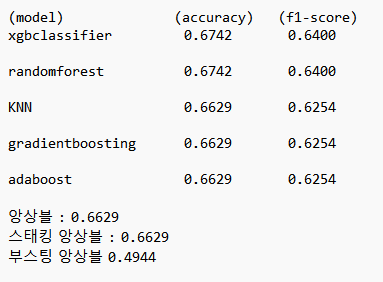

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## XGBoost

In [23]:
# smote 안 시킨 데이터
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_set = [(X_test, y_test)])
y_pred = xgb_clf.predict(X_test)

NameError: ignored

* model fitting

In [77]:
import xgboost as xgb

# XGBoost 모델 초기화
xgb_model = xgb.XGBClassifier()

# 파라미터 그리드 정의
param_grid = {
    'max_depth': [3, 4, 5, 7],  # 트리의 최대 깊이
    'learning_rate': [0.01, 0.05, 0.1],  # 학습률
    'n_estimators': [30, 50, 100, 200],  # 트리의 개수
    'min_child_weight': [0.01, 0.03, 0.05]
}

# 그리드 서치를 사용하여 최적의 파라미터 찾기
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
best_params = grid_search.best_params_
print("최적의 파라미터:", best_params)

# 최적의 파라미터로 모델 재초기화 및 학습
xgb_model = xgb.XGBClassifier(**best_params)
xgb_model.fit(X_train, y_train)

# 모델을 사용하여 테스트 데이터 예측
y_pred = xgb_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("테스트 정확도:", accuracy)

최적의 파라미터: {'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 0.01, 'n_estimators': 200}
테스트 정확도: 0.6629213483146067


In [78]:
import pickle

# 모델 저장
with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

In [79]:
# 모델 불러오기
with open('xgboost_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# 불러온 모델을 사용하여 예측 등을 수행할 수 있습니다.
predictions = loaded_model.predict(X_test)

* 모델 성능 평가

In [ ]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred, average='weighted')
  recall = recall_score(y_test, pred, average='weighted')
  f1 = f1_score(y_test, pred, average='weighted')
  print('오차 행렬')
  print(confusion)
  # f1 score print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

get_clf_eval(y_test, y_pred)

In [ ]:
# 개별 데이터별로 예측 확률
pred_proba = xgb_model.predict_proba(X_test)
pred = xgb_model.predict(X_test)
print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

* feature importance

In [ ]:
plt.rc('font', family='NanumGothic') #matplotlib 한글 깨짐 방지

ftr_importances_values = xgb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top15 = ftr_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 15')
sns.barplot(x=ftr_top15, y=ftr_top15.index)
plt.show()

In [ ]:
ftr_importances.sort_values(ascending=False)[:15]

* XAI shap

    https://github.com/shap/shap

    https://towardsdatascience.com/explainable-ai-xai-with-shap-multi-class-classification-problem-64dd30f97cea

In [ ]:
pip install shap

In [ ]:
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shap_values, X)

In [ ]:
shap.summary_plot(shap_values[1], X_test, title="Class 0 Summary Plot")

In [ ]:
shap.dependence_plot(2, shap_values[0], X_test)

## 랜덤포레스트



* model fitting

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 모델 초기화
rf_model = RandomForestClassifier()

# 파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 150, 250],  # 트리의 개수
    'max_depth': [3, 5, 7],  # 트리의 최대 깊이
    'min_samples_split': [2, 3, 4],  # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 3, 4],  # 리프 노드의 최소 샘플 수
}

# 그리드 서치를 사용하여 최적의 파라미터 찾기
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
best_params = grid_search.best_params_
print("최적의 파라미터:", best_params)

# 최적의 파라미터로 모델 재초기화 및 학습
rf_model = RandomForestClassifier(**best_params)
rf_model.fit(X_train, y_train)

# 모델을 사용하여 테스트 데이터 예측
y_pred2 = rf_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred2)
print("테스트 정확도:", accuracy)

* 모델 성능 평가

In [ ]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred, average='weighted')
  recall = recall_score(y_test, pred, average='weighted')
  f1 = f1_score(y_test, pred, average='weighted')
  print('오차 행렬')
  print(confusion)
  # f1 score print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

get_clf_eval(y_test, y_pred2)

In [ ]:
# 개별 데이터별로 예측 확률
pred_proba = rf_model.predict_proba(X_test)
pred = rf_model.predict(X_test)
print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

* feature importance

In [ ]:
ftr_importances_values = rf_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top15 = ftr_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 15')
sns.barplot(x=ftr_top15, y=ftr_top15.index)
plt.show()

In [ ]:
ftr_importances.sort_values(ascending=False)[:10]

* XAI shap

In [ ]:
import shap
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shap_values, X)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN 모델 생성
knn_classifier = KNeighborsClassifier()

# 탐색할 K 값 후보 리스트
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# 그리드 탐색 객체 생성
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# 그리드 탐색 수행
grid_search.fit(X_train, y_train)

# 최적의 K 값
best_k = grid_search.best_params_['n_neighbors']

# 최적의 K 값으로 모델 학습
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred3 = best_knn_classifier.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred3)
accuracy

0.6629213483146067

* 모델 성능 평가

In [ ]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred, average='weighted')
  recall = recall_score(y_test, pred, average='weighted')
  f1 = f1_score(y_test, pred, average='weighted')
  print('오차 행렬')
  print(confusion)
  # f1 score print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

get_clf_eval(y_test, y_pred3)

오차 행렬
[[ 0  8  1  0]
 [ 0 28 23  0]
 [ 0 13 87  1]
 [ 0  2 12  3]]
정확도: 0.6629, 정밀도: 0.6303, 재현율: 0.6629, F1:0.6254


In [ ]:
# 개별 데이터별로 예측 확률
pred_proba = best_knn_classifier.predict_proba(X_test)
pred = best_knn_classifier.predict(X_test)
print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 Shape : (178, 4)
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.         0.33333333 0.66666667 0.         2.        ]
 [0.         0.         1.         0.         2.        ]
 [0.         0.22222222 0.55555556 0.22222222 2.        ]]


# GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting 분류기 초기화
gb_classifier = GradientBoostingClassifier()

# 튜닝할 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 7],
}

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터를 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델로 예측
best_gb_classifier = grid_search.best_estimator_
y_pred4 = best_gb_classifier.predict(X_test)

# 정확도를 평가합니다.
accuracy = accuracy_score(y_test, y_pred4)
print("테스트 세트 정확도:", accuracy)

최적 하이퍼파라미터: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}
테스트 세트 정확도: 0.6629213483146067


* 모델 성능 평가

In [ ]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred, average='weighted')
  recall = recall_score(y_test, pred, average='weighted')
  f1 = f1_score(y_test, pred, average='weighted')
  print('오차 행렬')
  print(confusion)
  # f1 score print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

get_clf_eval(y_test, y_pred4)

오차 행렬
[[ 0  8  1  0]
 [ 0 28 23  0]
 [ 0 13 87  1]
 [ 0  2 12  3]]
정확도: 0.6629, 정밀도: 0.6303, 재현율: 0.6629, F1:0.6254


In [ ]:
# 개별 데이터별로 예측 확률
pred_proba = best_gb_classifier.predict_proba(X_test)
pred = best_gb_classifier.predict(X_test)
print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 Shape : (178, 4)
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.00251743 0.26557112 0.72384046 0.008071   2.        ]
 [0.00206735 0.01151295 0.90503006 0.08138965 2.        ]
 [0.00325436 0.25298186 0.61232058 0.13144321 2.        ]]


* feature importance

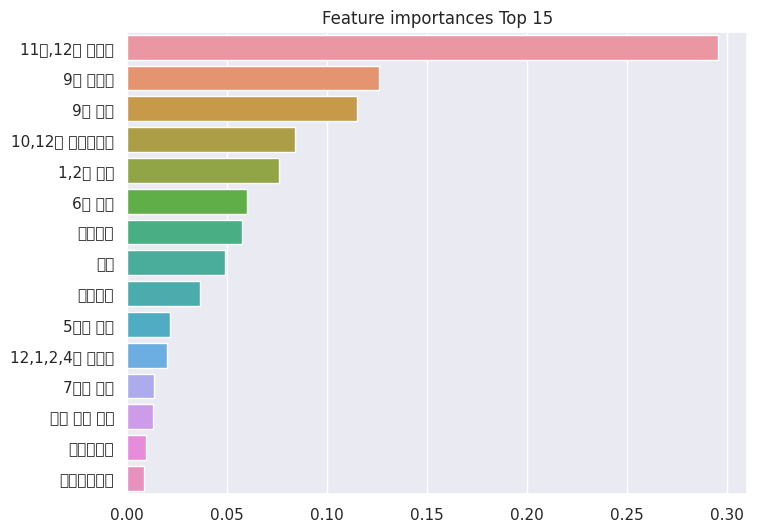

In [ ]:
ftr_importances_values = best_gb_classifier.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top15 = ftr_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 15')
sns.barplot(x=ftr_top15, y=ftr_top15.index)
plt.show()

In [ ]:
ftr_importances.sort_values(ascending=False)[:10]

11월,12월 일조율     0.295506
9월 일조율          0.126175
9월 온도           0.115140
10,12월 월합강수량    0.084015
1,2월 온도         0.075666
6월 기온           0.059769
평균풍속            0.057610
기타              0.048780
폭염일수            0.036426
5월의 기온          0.021291
dtype: float64

# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier  # 예시로 DecisionTreeClassifier를 사용합니다.

# AdaBoost 분류기 초기화
base_classifier = DecisionTreeClassifier()  # 예시로 max_depth를 1로 설정합니다.
ada_classifier = AdaBoostClassifier(base_estimator=base_classifier)

# 튜닝할 하이퍼파라미터 그리드 정의

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'base_estimator__max_depth': [2, 3, 4, 5],  # DecisionTreeClassifier의 max_depth 조정
}

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터를 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적 모델로 예측
best_ada_classifier = grid_search.best_estimator_
y_pred5 = best_ada_classifier.predict(X_test)

# 정확도를 평가합니다.
accuracy = accuracy_score(y_test, y_pred5)
print("테스트 세트 정확도:", accuracy)

최적 하이퍼파라미터: {'base_estimator__max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 200}
테스트 세트 정확도: 0.6629213483146067


* 모델 성능 평가

In [ ]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred, average='weighted')
  recall = recall_score(y_test, pred, average='weighted')
  f1 = f1_score(y_test, pred, average='weighted')
  print('오차 행렬')
  print(confusion)
  # f1 score print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

get_clf_eval(y_test, y_pred5)

오차 행렬
[[ 0  8  1  0]
 [ 0 28 23  0]
 [ 0 13 87  1]
 [ 0  2 12  3]]
정확도: 0.6629, 정밀도: 0.6303, 재현율: 0.6629, F1:0.6254


In [ ]:
# 개별 데이터별로 예측 확률
pred_proba = best_ada_classifier.predict_proba(X_test)
pred = best_ada_classifier.predict(X_test)
print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))

# 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 Shape : (178, 4)
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[6.83096290e-11 2.90496652e-01 7.09503348e-01 6.25519153e-14
  2.00000000e+00]
 [3.55607712e-15 6.32311266e-05 8.85490157e-01 1.14446612e-01
  2.00000000e+00]
 [9.15433920e-12 2.38017444e-01 6.21902930e-01 1.40079626e-01
  2.00000000e+00]]


* feature importance

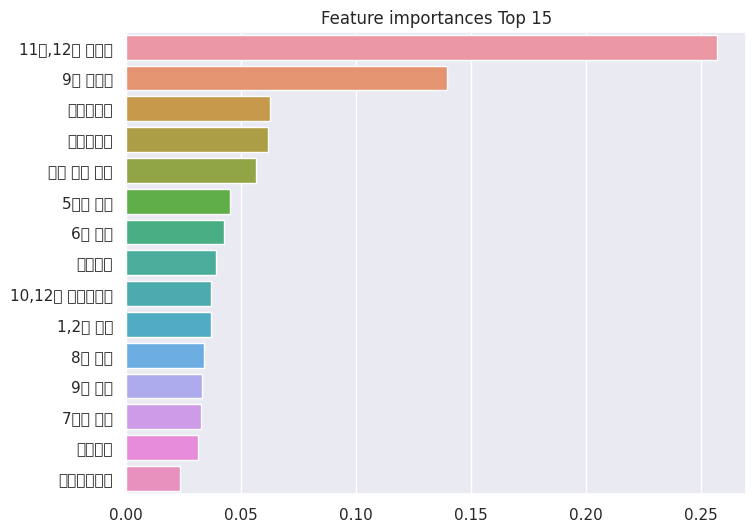

In [ ]:
ftr_importances_values = best_ada_classifier.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top15 = ftr_importances.sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 15')
sns.barplot(x=ftr_top15, y=ftr_top15.index)
plt.show()

In [ ]:
ftr_importances.sort_values(ascending=False)[:10]

11월,12월 일조율     0.256777
9월 일조율          0.139628
합계강수량           0.062641
합계일사량           0.061604
평균 상대 습도        0.056405
5월의 기온          0.044997
6월 기온           0.042561
폭염일수            0.038877
10,12월 월합강수량    0.036785
1,2월 온도         0.036774
dtype: float64

# 스태킹

In [ ]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

# 각 모델 생성
xgb = XGBClassifier(learning_rate = 0.01, max_depth = 5, min_child_weight = 0.01, n_estimators = 200)

rf = RandomForestClassifier(max_depth = 7, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 150)

gb = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 400)


# 각 모델을 학습
xgb.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Voting Classifier를 사용하여 앙상블 생성
# 이 예에서는 하드 보팅(각 모델의 예측 결과를 다수결로 선택)을 사용합니다.
voting_classifier = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('rf', rf),
    ('gb', gb)
], voting='hard')

# Voting Classifier 학습
voting_classifier.fit(X_train, y_train)

# 각 모델의 예측을 얻을 수 있습니다.
xgb_predictions = xgb.predict(X_test)
rf_predictions = rf.predict(X_test)
gb_predictions = gb.predict(X_test)
voting_predictions = voting_classifier.predict(X_test)

print(f"앙상블 모델의 정확도: {accuracy_score(y_test, voting_predictions):.4f}")
f1 = f1_score(y_test, voting_predictions, average='weighted')
print(f"F1 점수: {f1}")

앙상블 모델의 정확도: 0.6629
F1 점수: 0.6253511235955056


In [ ]:
# 스태킹 앙상블

from sklearn.ensemble import StackingClassifier

# 각 모델 생성
xgb = XGBClassifier(learning_rate = 0.01, max_depth = 5, min_child_weight = 0.01, n_estimators = 200)

rf = RandomForestClassifier(max_depth = 7, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 150)

gb = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 400)

# 스태킹 앙상블 생성
stacking_models = [
    ('xgb', xgb),
    ('rf', rf),
    ('gb', gb)
]

stacking_classifier = StackingClassifier(
    estimators=stacking_models,
)

# 스태킹 앙상블 모델 훈련
stacking_classifier.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
stacking_predictions = stacking_classifier.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, stacking_predictions)
print(f"스태킹 앙상블의 정확도: {accuracy:.4f}")
f1 = f1_score(y_test, stacking_predictions, average='weighted')
print(f"F1 점수: {f1}")

스태킹 앙상블의 정확도: 0.6629
F1 점수: 0.6253511235955056


In [ ]:
# 부스팅 앙상블

from sklearn.ensemble import AdaBoostClassifier

# 각 모델 생성
xgb = XGBClassifier(learning_rate = 0.01, max_depth = 5, min_child_weight = 0.01, n_estimators = 200)

rf = RandomForestClassifier(max_depth = 7, min_samples_leaf = 3, min_samples_split = 2, n_estimators = 150)

gb = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 400)


# 부스팅 앙상블 생성
adaboost_models = [
    ('xgb', xgb),
    ('rf', rf),
    ('gb', gb)
]

adaboost_classifier = AdaBoostClassifier(
    n_estimators=50,  # 부스팅 라운드 수
    learning_rate=1.0  # 학습률
)

# 부스팅 앙상블 모델 훈련
adaboost_classifier.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
adaboost_predictions = adaboost_classifier.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, adaboost_predictions)
print(f"부스팅 앙상블의 정확도: {accuracy:.4f}")
f1 = f1_score(y_test, adaboost_predictions, average='weighted')
print(f"F1 점수: {f1}")

부스팅 앙상블의 정확도: 0.5000
F1 점수: 0.5072172241952079


>> 0.67~0.68 왔다갔다 함